In [29]:
from utils import datasets, metrics, core_models, cpd_models, model_utils
from utils.ensembles import EnsembleCPDModel
from utils.model_utils import fix_seeds

import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torch.utils.data import DataLoader

#import pytorch_lightning as pl

from abc import ABC
from datetime import datetime

import yaml
import os

import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Synthetic 1D Data, single model

In [37]:
experiments_name = "synthetic_1D"
train_dataset, test_dataset = datasets.CPDDatasets(experiments_name=experiments_name).get_dataset_()

In [38]:
# core model for Synthetic 1D
core_model_bce = core_models.BaseRnn(
    input_size=1,
    hidden_dim=4,
    n_layers=1,
    drop_prob=0.5
)

In [39]:
# create dictionary with default arguments for consistency with our interface
# define arguments as they are set in the corresponding config file
learning = dict()
learning["batch_size"] = 64
learning["lr"] = 0.001
learning["epochs"] = 50
learning["grad_clip"] = 0.0

loss = dict()
loss["T"] = 32

args = dict()
args["learning"] = learning
args["loss"] = loss

args["experiments_name"] = experiments_name
args["num_workers"] = 2

In [40]:
# define CPDModel with BCE loss
bce_model = cpd_models.CPDModel(
    loss_type="bce",
    args=args,
    model=core_model_bce,
    train_dataset=train_dataset,
    test_dataset=test_dataset
)

In [41]:
# use logger
model_name = f'seq2seq_bce_seed_{SEED}'
logger = TensorBoardLogger(save_dir=f'logs/{experiments_name}', name=model_name)

# define trainer with custom parameters
trainer = pl.Trainer(
    max_epochs=100,
    accelerator="gpu",
    devices=1,
    benchmark=True,
    check_val_every_n_epoch=1,
    gradient_clip_val=0.,
    logger=logger,
    
    # use early stopping
    callbacks=EarlyStopping(monitor="val_loss", min_delta=0, patience=10)
)

trainer.fit(bce_model)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.


In [13]:
%load_ext tensorboard 
%tensorboard --logdir logs --port 2222

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 2222 (pid 15720), started 0:01:51 ago. (Use '!kill 15720' to kill it.)

In [42]:
# create list of thresholds from [0, 1]
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

metrics_local, delay_list, fp_delay_list = \
    metrics.evaluation_pipeline(bce_model,
                                bce_model.val_dataloader(),
                                threshold_list,
                                device="cuda", # choose 'cpu' or 'cuda' if available
                                model_type="seq2seq",
                                verbose=True
                               )

  2%|▏         | 1/52 [00:00<00:42,  1.21it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  4%|▍         | 2/52 [00:01<00:41,  1.20it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  6%|▌         | 3/52 [00:02<00:40,  1.20it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  8%|▊         | 4/52 [00:03<00:40,  1.20it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 10%|▉         | 5/52 [00:04<00:38,  1.21it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 12%|█▏        | 6/52 [00:04<00:37,  1.22it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 13%|█▎        | 7/52 [00:05<00:36,  1.23it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 15%|█▌        | 8/52 [00:06<00:35,  1.23it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 17%|█▋        | 9/52 [00:07<00:35,  1.22it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 19%|█▉        | 10/52 [00:08<00:35,  1.20it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 21%|██        | 11/52 [00:09<00:34,  1.18it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 23%|██▎       | 12/52 [00:09<00:33,  1.20it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 25%|██▌       | 13/52 [00:10<00:32,  1.20it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 27%|██▋       | 14/52 [00:11<00:32,  1.18it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 29%|██▉       | 15/52 [00:12<00:31,  1.19it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 31%|███       | 16/52 [00:13<00:30,  1.18it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 33%|███▎      | 17/52 [00:14<00:29,  1.18it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 35%|███▍      | 18/52 [00:15<00:28,  1.19it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 37%|███▋      | 19/52 [00:15<00:27,  1.21it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 38%|███▊      | 20/52 [00:16<00:26,  1.22it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 40%|████      | 21/52 [00:17<00:25,  1.23it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 42%|████▏     | 22/52 [00:18<00:24,  1.22it/s]

TN: 7, FP: 284, FN: 1, TP: 8, DELAY:0.1599999964237213, FP_DELAY:4.730000019073486, COVER: 0.830067138671875


 44%|████▍     | 23/52 [00:19<00:24,  1.19it/s]

TN: 84, FP: 107, FN: 3, TP: 106, DELAY:0.5433333516120911, FP_DELAY:58.80666732788086, COVER: 0.9398053039711719


 46%|████▌     | 24/52 [00:19<00:23,  1.19it/s]

TN: 114, FP: 52, FN: 4, TP: 130, DELAY:0.5799999833106995, FP_DELAY:77.41666412353516, COVER: 0.965951506243062


 48%|████▊     | 25/52 [00:20<00:22,  1.18it/s]

TN: 134, FP: 18, FN: 5, TP: 143, DELAY:0.7666666507720947, FP_DELAY:89.19000244140625, COVER: 0.9803842516775851


 50%|█████     | 26/52 [00:21<00:21,  1.19it/s]

TN: 137, FP: 6, FN: 7, TP: 150, DELAY:1.4266666173934937, FP_DELAY:93.06999969482422, COVER: 0.9884354981468577


 52%|█████▏    | 27/52 [00:22<00:21,  1.17it/s]

TN: 140, FP: 2, FN: 7, TP: 151, DELAY:1.5166666507720947, FP_DELAY:94.663330078125, COVER: 0.9885255239137092


 54%|█████▍    | 28/52 [00:23<00:20,  1.18it/s]

TN: 141, FP: 1, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:127.57333374023438, COVER: 0.8226481119791667


 56%|█████▌    | 29/52 [00:24<00:19,  1.18it/s]

TN: 141, FP: 1, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:127.57333374023438, COVER: 0.8226481119791667


 58%|█████▊    | 30/52 [00:25<00:18,  1.19it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 60%|█████▉    | 31/52 [00:25<00:17,  1.21it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 62%|██████▏   | 32/52 [00:26<00:16,  1.22it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 63%|██████▎   | 33/52 [00:27<00:15,  1.23it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 65%|██████▌   | 34/52 [00:28<00:14,  1.23it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 67%|██████▋   | 35/52 [00:29<00:13,  1.22it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 69%|██████▉   | 36/52 [00:29<00:13,  1.22it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 71%|███████   | 37/52 [00:30<00:12,  1.21it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 73%|███████▎  | 38/52 [00:31<00:11,  1.20it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 75%|███████▌  | 39/52 [00:32<00:10,  1.21it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 77%|███████▋  | 40/52 [00:33<00:10,  1.20it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 79%|███████▉  | 41/52 [00:34<00:09,  1.20it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 81%|████████  | 42/52 [00:34<00:08,  1.21it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 83%|████████▎ | 43/52 [00:35<00:07,  1.21it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 85%|████████▍ | 44/52 [00:36<00:06,  1.22it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 87%|████████▋ | 45/52 [00:37<00:05,  1.23it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 88%|████████▊ | 46/52 [00:38<00:04,  1.23it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 90%|█████████ | 47/52 [00:38<00:04,  1.23it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 92%|█████████▏| 48/52 [00:39<00:03,  1.24it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 94%|█████████▍| 49/52 [00:40<00:02,  1.21it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 96%|█████████▌| 50/52 [00:41<00:01,  1.20it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 98%|█████████▊| 51/52 [00:42<00:00,  1.19it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


100%|██████████| 52/52 [00:43<00:00,  1.20it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667
AUC: 640.27
Time to FA 94.6633, delay detection 1.5167 for best-F1 threshold: 0.5255
TN 140, FP 2, FN 7, TP 151 for best-F1 threshold: 0.5255
Max F1 0.9711: for best-F1 threshold 0.5255
COVER 0.9885: for best-F1 threshold 0.5255
Max COVER 0.9885: for threshold 0.5255


# Ensemble model, Synthetic 1D

In [9]:
model_type = "seq2seq"
experiments_name = "synthetic_1D"

# read arguments from a default config file
path_to_config = "configs/" + experiments_name + "_" + model_type + ".yaml"

with open(path_to_config, 'r') as f:
    args_config = yaml.safe_load(f.read())

# update args dictionary for con
args_config["experiments_name"] = experiments_name
args_config["model_type"] = model_type
args_config["loss_type"] = "bce"
args_config["num_workers"] = 2

# this has changed in a newer version of PytorchLightning
# if you installed 1.1.6 (as in the requirements.txt), the argument should be: args_config["learning"]["gpus"] = 1
args_config["learning"]["accelerator"] = "gpu"
args_config["learning"]["devices"] = 1
# args_config["learning"]["gpus"] = 1

# set smaller number of epochs
args_config["learning"]["epochs"] = 100

In [10]:
# If boot_sample_size is not None, bootstrap new train dataset for each model
# Else, train all models on the original train dataset
ens_synth1d_bce = EnsembleCPDModel(args_config, n_models=10, boot_sample_size=300)

In [11]:
ens_synth1d_bce.fit()

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 1.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 2.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 3.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 4.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 5.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 6.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 7.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 8.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 9.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 10.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=1` reached.


In [18]:
# save models

path_to_folder = "saved_models/try"
ens_synth1d_bce.save_models_list(path_to_folder)

# initialize new model and load weights
new_ens_synth1d_bce = EnsembleCPDModel(args_config, n_models=10, boot_sample_size=300)
new_ens_synth1d_bce.load_models_list(path_to_folder)

## Predictions for random sequences

In [ ]:
#def visualize_predictions(model, sequences_batch, labels_batch, n_pics=10):
#    try preds = model(sequences_batch)
#    except preds = model.predict(sequences_batch)
    
#    for i in range(n_pics):
        

In [59]:
seq_batch, labels_batch = next(iter(test_dataloader))
# seq_bstch has shape (batch_size, seq_len, input_dim)

seq_batch = seq_batch#.to("cuda")

preds_mean, preds_std = ens_synth1d_bce.predict(seq_batch)

Text(0.5, 1.0, 'Sequence')

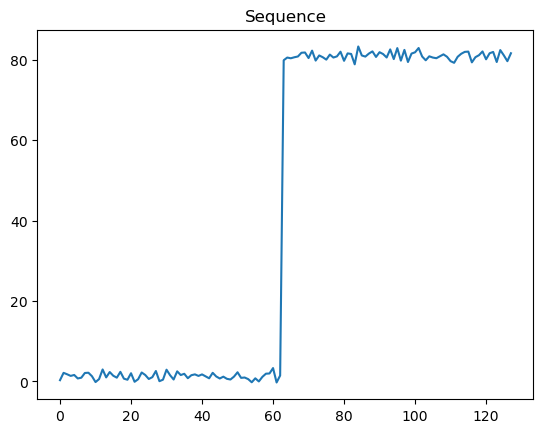

In [60]:
idx = 2
plt.plot(seq_batch[idx].cpu())
plt.title("Sequence")

Text(0.5, 1.0, 'Mean +- std redictions')

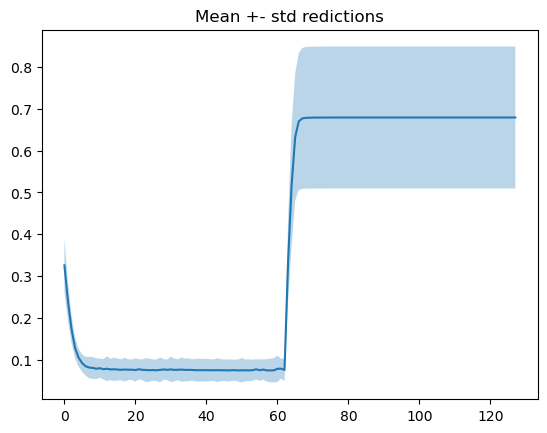

In [61]:
mean = preds_mean[idx].detach().cpu()
std = preds_std[idx].detach().cpu()

# to obtain 0.95 confidence intervals
n_models = len(mean)
coeff = 1.96 / math.sqrt(n_models)

plt.plot(mean, label="Predictions")
plt.fill_between(range(len(mean)), mean - coeff * std, mean + coeff * std, alpha=0.3)
plt.plot(labels_batch[idx], label="Labels")
plt.title("Mean +- std redictions")
plt.legend()
plt.show()

In [ ]:
# create list of thresholds from [0, 1]
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

metrics_local, delay_list, fp_delay_list = \
    metrics.evaluation_pipeline(ens_synth1d_bce,
                                test_dataloader,
                                threshold_list,
                                device="cuda", # choose 'cpu' or 'cuda' if available
                                model_type="ensemble",
                                verbose=True
                               )

# Explore different bootstrap sample size

In [7]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

In [8]:
model_type = "seq2seq"
experiments_name = "synthetic_1D"

# read arguments from a default config file
path_to_config = "configs/" + experiments_name + "_" + model_type + ".yaml"

with open(path_to_config, 'r') as f:
    args_config = yaml.safe_load(f.read())

# update args dictionary for con
args_config["experiments_name"] = experiments_name
args_config["model_type"] = model_type
args_config["loss_type"] = "bce"
args_config["num_workers"] = 2

# this has changed in a newer version of PytorchLightning
# if you installed 1.1.6 (as in the requirements.txt), the argument should be: args_config["learning"]["gpus"] = 1
args_config["learning"]["accelerator"] = "gpu"
args_config["learning"]["devices"] = 1
# args_config["learning"]["gpus"] = 1

# set smaller number of epochs
args_config["learning"]["epochs"] = 100

In [9]:
boots_sample_sizes_list = [None, 100, 300, 500]
seed = 0

for boot_sample_size in boots_sample_sizes_list:
    print("Sample size:", boot_sample_size)
    
    ens_synth1d_bce = EnsembleCPDModel(args_config, n_models=10, boot_sample_size=boot_sample_size, seed=seed)
    ens_synth1d_bce.fit()
    metrics_local, delay_list, fp_delay_list = \
        metrics.evaluation_pipeline(ens_synth1d_bce,
                                    test_dataloader,
                                    threshold_list,
                                    device="cuda", # choose 'cpu' or 'cuda' if available
                                    model_type="ensemble",
                                    verbose=True
                                   )
    metrics.write_metrics_to_file(
        filename="results/results_" + experiments_name + "_" + model_type + "_10_models.txt",
        metrics=metrics_local,
        seed=seed,
        timestamp=datetime.now().strftime("%y%m%dT%H%M%S"),
        sample_size=boot_sample_size
    )

Sample size: None


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Fitting model number 1.


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 2.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 3.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 4.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 5.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 6.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 7.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 8.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 9.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 10.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
  1%|▍                                          | 1/102 [00:00<01:29,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  2%|▊                                          | 2/102 [00:01<01:28,  1.14it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  3%|█▎                                         | 3/102 [00:02<01:27,  1.14it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  4%|█▋                                         | 4/102 [00:03<01:26,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  5%|██                                         | 5/102 [00:04<01:26,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  6%|██▌                                        | 6/102 [00:05<01:25,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  7%|██▉                                        | 7/102 [00:06<01:25,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  8%|███▎                                       | 8/102 [00:07<01:24,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  9%|███▊                                       | 9/102 [00:08<01:23,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 10%|████                                      | 10/102 [00:08<01:22,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 11%|████▌                                     | 11/102 [00:09<01:21,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 12%|████▉                                     | 12/102 [00:10<01:20,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 13%|█████▎                                    | 13/102 [00:11<01:19,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 14%|█████▊                                    | 14/102 [00:12<01:18,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 15%|██████▏                                   | 15/102 [00:13<01:17,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 16%|██████▌                                   | 16/102 [00:14<01:17,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 17%|███████                                   | 17/102 [00:15<01:16,  1.11it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 18%|███████▍                                  | 18/102 [00:16<01:15,  1.11it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 19%|███████▊                                  | 19/102 [00:16<01:14,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 20%|████████▏                                 | 20/102 [00:17<01:12,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 21%|████████▋                                 | 21/102 [00:18<01:11,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 22%|█████████                                 | 22/102 [00:19<01:11,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 23%|█████████▍                                | 23/102 [00:20<01:10,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 24%|█████████▉                                | 24/102 [00:21<01:09,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 25%|██████████▎                               | 25/102 [00:22<01:08,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 25%|██████████▋                               | 26/102 [00:23<01:07,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 26%|███████████                               | 27/102 [00:24<01:06,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 27%|███████████▌                              | 28/102 [00:24<01:05,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 28%|███████████▉                              | 29/102 [00:25<01:04,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 29%|████████████▎                             | 30/102 [00:26<01:03,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 30%|████████████▊                             | 31/102 [00:27<01:02,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 31%|█████████████▏                            | 32/102 [00:28<01:01,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 32%|█████████████▌                            | 33/102 [00:29<01:01,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 33%|██████████████                            | 34/102 [00:30<01:00,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 34%|██████████████▍                           | 35/102 [00:31<00:59,  1.12it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 35%|██████████████▊                           | 36/102 [00:32<00:58,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 36%|███████████████▏                          | 37/102 [00:32<00:57,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 37%|███████████████▋                          | 38/102 [00:33<00:56,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 38%|████████████████                          | 39/102 [00:34<00:55,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 39%|████████████████▍                         | 40/102 [00:35<00:55,  1.13it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 40%|████████████████▉                         | 41/102 [00:36<00:54,  1.12it/s]

TN: 34, FP: 218, FN: 2, TP: 46, DELAY:0.3866666555404663, FP_DELAY:24.366666793823242, COVER: 0.8753677743923611


 41%|█████████████████▎                        | 42/102 [00:37<00:53,  1.12it/s]

TN: 71, FP: 137, FN: 3, TP: 89, DELAY:0.5233333110809326, FP_DELAY:49.97999954223633, COVER: 0.9223462233521057


 42%|█████████████████▋                        | 43/102 [00:38<00:52,  1.12it/s]

TN: 92, FP: 95, FN: 3, TP: 110, DELAY:0.5533333420753479, FP_DELAY:62.71666717529297, COVER: 0.941997975148102


 43%|██████████████████                        | 44/102 [00:39<00:51,  1.13it/s]

TN: 107, FP: 61, FN: 3, TP: 129, DELAY:0.5733333230018616, FP_DELAY:74.02999877929688, COVER: 0.9645650948916596


 44%|██████████████████▌                       | 45/102 [00:40<00:50,  1.13it/s]

TN: 118, FP: 46, FN: 3, TP: 133, DELAY:0.5733333230018616, FP_DELAY:79.25333404541016, COVER: 0.968923818849993


 45%|██████████████████▉                       | 46/102 [00:40<00:49,  1.13it/s]

TN: 127, FP: 27, FN: 4, TP: 142, DELAY:0.6133333444595337, FP_DELAY:85.91666412353516, COVER: 0.9792366559965704


 46%|███████████████████▎                      | 47/102 [00:41<00:48,  1.13it/s]

TN: 135, FP: 16, FN: 4, TP: 145, DELAY:0.6233333349227905, FP_DELAY:90.03666687011719, COVER: 0.9836861053924508


 47%|███████████████████▊                      | 48/102 [00:42<00:47,  1.13it/s]

TN: 137, FP: 14, FN: 4, TP: 145, DELAY:0.6266666650772095, FP_DELAY:90.88999938964844, COVER: 0.9836426819466836


 48%|████████████████████▏                     | 49/102 [00:43<00:46,  1.13it/s]

TN: 140, FP: 8, FN: 4, TP: 148, DELAY:0.6299999952316284, FP_DELAY:92.9366683959961, COVER: 0.9852619728951845


 49%|████████████████████▌                     | 50/102 [00:44<00:45,  1.13it/s]

TN: 141, FP: 7, FN: 4, TP: 148, DELAY:0.653333306312561, FP_DELAY:93.36333465576172, COVER: 0.9849009035524788


 50%|█████████████████████                     | 51/102 [00:45<00:44,  1.14it/s]

TN: 141, FP: 4, FN: 4, TP: 151, DELAY:0.7099999785423279, FP_DELAY:93.87000274658203, COVER: 0.9881699981585204


 51%|█████████████████████▍                    | 52/102 [00:46<00:44,  1.14it/s]

TN: 141, FP: 2, FN: 4, TP: 153, DELAY:0.7666666507720947, FP_DELAY:94.15666961669922, COVER: 0.9899212008417742


 52%|█████████████████████▊                    | 53/102 [00:47<00:43,  1.14it/s]

TN: 142, FP: 0, FN: 5, TP: 153, DELAY:1.2133333683013916, FP_DELAY:95.01000213623047, COVER: 0.9880241570264654


 53%|██████████████████████▏                   | 54/102 [00:47<00:42,  1.13it/s]

TN: 142, FP: 0, FN: 5, TP: 153, DELAY:1.3566666841506958, FP_DELAY:95.01000213623047, COVER: 0.9858053598769645


 54%|██████████████████████▋                   | 55/102 [00:48<00:41,  1.12it/s]

TN: 142, FP: 0, FN: 5, TP: 153, DELAY:1.403333306312561, FP_DELAY:95.01000213623047, COVER: 0.9850961654753193


 55%|███████████████████████                   | 56/102 [00:49<00:41,  1.12it/s]

TN: 142, FP: 0, FN: 5, TP: 153, DELAY:1.4266666173934937, FP_DELAY:95.01000213623047, COVER: 0.9847404929015916


 56%|███████████████████████▍                  | 57/102 [00:50<00:40,  1.12it/s]

TN: 142, FP: 0, FN: 5, TP: 153, DELAY:1.4366666078567505, FP_DELAY:95.01000213623047, COVER: 0.9845910242267247


 57%|███████████████████████▉                  | 58/102 [00:51<00:39,  1.12it/s]

TN: 142, FP: 0, FN: 5, TP: 153, DELAY:1.4633333683013916, FP_DELAY:95.01000213623047, COVER: 0.9842103671659607


 58%|████████████████████████▎                 | 59/102 [00:52<00:38,  1.13it/s]

TN: 142, FP: 0, FN: 5, TP: 153, DELAY:1.4900000095367432, FP_DELAY:95.01000213623047, COVER: 0.9838874514281004


 59%|████████████████████████▋                 | 60/102 [00:53<00:37,  1.13it/s]

TN: 142, FP: 0, FN: 5, TP: 153, DELAY:1.5266666412353516, FP_DELAY:95.01000213623047, COVER: 0.9833899271021814


 60%|█████████████████████████                 | 61/102 [00:54<00:36,  1.12it/s]

TN: 142, FP: 0, FN: 6, TP: 152, DELAY:1.659999966621399, FP_DELAY:95.1866683959961, COVER: 0.9823903866267203


 61%|█████████████████████████▌                | 62/102 [00:55<00:35,  1.13it/s]

TN: 142, FP: 0, FN: 6, TP: 152, DELAY:1.7066667079925537, FP_DELAY:95.1866683959961, COVER: 0.9817731424162636


 62%|█████████████████████████▉                | 63/102 [00:55<00:34,  1.13it/s]

TN: 142, FP: 0, FN: 7, TP: 151, DELAY:2.140000104904175, FP_DELAY:95.51667022705078, COVER: 0.9789809864536113


 63%|██████████████████████████▎               | 64/102 [00:56<00:33,  1.13it/s]

TN: 142, FP: 0, FN: 7, TP: 151, DELAY:2.5366666316986084, FP_DELAY:95.51667022705078, COVER: 0.9738501871285734


 64%|██████████████████████████▊               | 65/102 [00:57<00:32,  1.13it/s]

TN: 142, FP: 0, FN: 10, TP: 148, DELAY:2.816666603088379, FP_DELAY:95.88666534423828, COVER: 0.9732439443446591


 65%|███████████████████████████▏              | 66/102 [00:58<00:31,  1.13it/s]

TN: 142, FP: 0, FN: 11, TP: 147, DELAY:3.1466667652130127, FP_DELAY:96.16999816894531, COVER: 0.9712780387163888


 66%|███████████████████████████▌              | 67/102 [00:59<00:30,  1.13it/s]

TN: 142, FP: 0, FN: 14, TP: 144, DELAY:3.630000114440918, FP_DELAY:96.79666900634766, COVER: 0.9690190528482049


 67%|████████████████████████████              | 68/102 [01:00<00:29,  1.13it/s]

TN: 142, FP: 0, FN: 17, TP: 141, DELAY:4.306666851043701, FP_DELAY:96.96666717529297, COVER: 0.9602796622522519


 68%|████████████████████████████▍             | 69/102 [01:01<00:29,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 69%|████████████████████████████▊             | 70/102 [01:02<00:28,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 70%|█████████████████████████████▏            | 71/102 [01:03<00:27,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 71%|█████████████████████████████▋            | 72/102 [01:03<00:26,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 72%|██████████████████████████████            | 73/102 [01:04<00:25,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 73%|██████████████████████████████▍           | 74/102 [01:05<00:24,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 74%|██████████████████████████████▉           | 75/102 [01:06<00:23,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 75%|███████████████████████████████▎          | 76/102 [01:07<00:22,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 75%|███████████████████████████████▋          | 77/102 [01:08<00:22,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 76%|████████████████████████████████          | 78/102 [01:09<00:21,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 77%|████████████████████████████████▌         | 79/102 [01:10<00:20,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 78%|████████████████████████████████▉         | 80/102 [01:11<00:19,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 79%|█████████████████████████████████▎        | 81/102 [01:11<00:18,  1.12it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 80%|█████████████████████████████████▊        | 82/102 [01:12<00:17,  1.12it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 81%|██████████████████████████████████▏       | 83/102 [01:13<00:16,  1.12it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 82%|██████████████████████████████████▌       | 84/102 [01:14<00:15,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 83%|███████████████████████████████████       | 85/102 [01:15<00:15,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 84%|███████████████████████████████████▍      | 86/102 [01:16<00:14,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 85%|███████████████████████████████████▊      | 87/102 [01:17<00:13,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 86%|████████████████████████████████████▏     | 88/102 [01:18<00:12,  1.14it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 87%|████████████████████████████████████▋     | 89/102 [01:18<00:11,  1.14it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 88%|█████████████████████████████████████     | 90/102 [01:19<00:10,  1.14it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 89%|█████████████████████████████████████▍    | 91/102 [01:20<00:09,  1.14it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 90%|█████████████████████████████████████▉    | 92/102 [01:21<00:08,  1.14it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 91%|██████████████████████████████████████▎   | 93/102 [01:22<00:07,  1.14it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 92%|██████████████████████████████████████▋   | 94/102 [01:23<00:07,  1.14it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 93%|███████████████████████████████████████   | 95/102 [01:24<00:06,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 94%|███████████████████████████████████████▌  | 96/102 [01:25<00:05,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 95%|███████████████████████████████████████▉  | 97/102 [01:26<00:04,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 96%|████████████████████████████████████████▎ | 98/102 [01:26<00:03,  1.14it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 97%|████████████████████████████████████████▊ | 99/102 [01:27<00:02,  1.14it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 98%|████████████████████████████████████████▏| 100/102 [01:28<00:01,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 99%|████████████████████████████████████████▌| 101/102 [01:29<00:00,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


100%|█████████████████████████████████████████| 102/102 [01:30<00:00,  1.13it/s]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667
AUC: 639.7336
Time to FA 95.01, delay detection 1.2133 for best-F1 threshold: 0.5378
TN 142, FP 0, FN 5, TP 153 for best-F1 threshold: 0.5378
Max F1 0.9839: for best-F1 threshold 0.5378
COVER 0.988: for best-F1 threshold 0.5378
Max COVER 0.9899: for threshold 0.5126
Sample size: 100



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 1.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 2.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 3.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 4.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 5.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 6.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 7.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 8.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 9.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 10.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
  1%|▍                                          | 1/102 [00:01<02:00,  1.20s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  2%|▊                                          | 2/102 [00:02<01:58,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  3%|█▎                                         | 3/102 [00:03<01:57,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  4%|█▋                                         | 4/102 [00:04<01:56,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  5%|██                                         | 5/102 [00:05<01:55,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  6%|██▌                                        | 6/102 [00:07<01:54,  1.20s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  7%|██▉                                        | 7/102 [00:08<01:53,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  8%|███▎                                       | 8/102 [00:09<01:51,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  9%|███▊                                       | 9/102 [00:10<01:50,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 10%|████                                      | 10/102 [00:11<01:49,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 11%|████▌                                     | 11/102 [00:13<01:47,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 12%|████▉                                     | 12/102 [00:14<01:46,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 13%|█████▎                                    | 13/102 [00:15<01:45,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 14%|█████▊                                    | 14/102 [00:16<01:44,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 15%|██████▏                                   | 15/102 [00:17<01:42,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 16%|██████▌                                   | 16/102 [00:18<01:41,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 17%|███████                                   | 17/102 [00:20<01:40,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 18%|███████▍                                  | 18/102 [00:21<01:39,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 19%|███████▊                                  | 19/102 [00:22<01:38,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 20%|████████▏                                 | 20/102 [00:23<01:36,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 21%|████████▋                                 | 21/102 [00:24<01:35,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 22%|█████████                                 | 22/102 [00:26<01:34,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 23%|█████████▍                                | 23/102 [00:27<01:33,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 24%|█████████▉                                | 24/102 [00:28<01:32,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 25%|██████████▎                               | 25/102 [00:29<01:31,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 25%|██████████▋                               | 26/102 [00:30<01:30,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 26%|███████████                               | 27/102 [00:32<01:29,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 27%|███████████▌                              | 28/102 [00:33<01:28,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 28%|███████████▉                              | 29/102 [00:34<01:27,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 29%|████████████▎                             | 30/102 [00:35<01:25,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 30%|████████████▊                             | 31/102 [00:36<01:24,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 31%|█████████████▏                            | 32/102 [00:37<01:23,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 32%|█████████████▌                            | 33/102 [00:39<01:21,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 33%|██████████████                            | 34/102 [00:40<01:20,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 34%|██████████████▍                           | 35/102 [00:41<01:19,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 35%|██████████████▊                           | 36/102 [00:42<01:18,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 36%|███████████████▏                          | 37/102 [00:43<01:16,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 37%|███████████████▋                          | 38/102 [00:45<01:15,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 38%|████████████████                          | 39/102 [00:46<01:14,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 39%|████████████████▍                         | 40/102 [00:47<01:13,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 40%|████████████████▉                         | 41/102 [00:48<01:12,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 41%|█████████████████▎                        | 42/102 [00:49<01:10,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 42%|█████████████████▋                        | 43/102 [00:50<01:09,  1.18s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 43%|██████████████████                        | 44/102 [00:52<01:08,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 44%|██████████████████▌                       | 45/102 [00:53<01:07,  1.19s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 45%|██████████████████▉                       | 46/102 [00:54<01:06,  1.19s/it]

TN: 42, FP: 221, FN: 3, TP: 34, DELAY:0.5600000023841858, FP_DELAY:25.64666748046875, COVER: 0.8566009349356752


 46%|███████████████████▎                      | 47/102 [00:55<01:05,  1.20s/it]

TN: 119, FP: 46, FN: 14, TP: 121, DELAY:2.863333225250244, FP_DELAY:81.71333312988281, COVER: 0.9505960329385836


 47%|███████████████████▊                      | 48/102 [00:57<01:04,  1.20s/it]

TN: 136, FP: 8, FN: 16, TP: 140, DELAY:3.43666672706604, FP_DELAY:93.72333526611328, COVER: 0.9700934602511158


 48%|████████████████████▏                     | 49/102 [00:58<01:03,  1.20s/it]

TN: 142, FP: 0, FN: 16, TP: 142, DELAY:3.696666717529297, FP_DELAY:96.95999908447266, COVER: 0.968322591509921


 49%|████████████████████▌                     | 50/102 [00:59<01:02,  1.20s/it]

TN: 142, FP: 0, FN: 17, TP: 141, DELAY:3.823333263397217, FP_DELAY:96.96666717529297, COVER: 0.9664783676766278


 50%|█████████████████████                     | 51/102 [01:00<01:01,  1.20s/it]

TN: 142, FP: 0, FN: 17, TP: 141, DELAY:4.063333511352539, FP_DELAY:96.96666717529297, COVER: 0.9630395929971649


 51%|█████████████████████▍                    | 52/102 [01:01<01:00,  1.20s/it]

TN: 142, FP: 0, FN: 22, TP: 136, DELAY:5.650000095367432, FP_DELAY:98.06999969482422, COVER: 0.9511473664721395


 52%|█████████████████████▊                    | 53/102 [01:03<00:58,  1.20s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 53%|██████████████████████▏                   | 54/102 [01:04<00:57,  1.20s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 54%|██████████████████████▋                   | 55/102 [01:05<00:56,  1.20s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 55%|███████████████████████                   | 56/102 [01:06<00:55,  1.20s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 56%|███████████████████████▍                  | 57/102 [01:07<00:54,  1.20s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 57%|███████████████████████▉                  | 58/102 [01:09<00:52,  1.20s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 58%|████████████████████████▎                 | 59/102 [01:10<00:51,  1.20s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 59%|████████████████████████▋                 | 60/102 [01:11<00:50,  1.20s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 60%|█████████████████████████                 | 61/102 [01:12<00:48,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 61%|█████████████████████████▌                | 62/102 [01:13<00:47,  1.20s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 62%|█████████████████████████▉                | 63/102 [01:14<00:46,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 63%|██████████████████████████▎               | 64/102 [01:16<00:45,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 64%|██████████████████████████▊               | 65/102 [01:17<00:44,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 65%|███████████████████████████▏              | 66/102 [01:18<00:42,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 66%|███████████████████████████▌              | 67/102 [01:19<00:41,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 67%|████████████████████████████              | 68/102 [01:20<00:40,  1.20s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 68%|████████████████████████████▍             | 69/102 [01:22<00:39,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 69%|████████████████████████████▊             | 70/102 [01:23<00:38,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 70%|█████████████████████████████▏            | 71/102 [01:24<00:37,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 71%|█████████████████████████████▋            | 72/102 [01:25<00:35,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 72%|██████████████████████████████            | 73/102 [01:26<00:34,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 73%|██████████████████████████████▍           | 74/102 [01:28<00:33,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 74%|██████████████████████████████▉           | 75/102 [01:29<00:32,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 75%|███████████████████████████████▎          | 76/102 [01:30<00:31,  1.20s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 75%|███████████████████████████████▋          | 77/102 [01:31<00:29,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 76%|████████████████████████████████          | 78/102 [01:32<00:28,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 77%|████████████████████████████████▌         | 79/102 [01:34<00:27,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 78%|████████████████████████████████▉         | 80/102 [01:35<00:26,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 79%|█████████████████████████████████▎        | 81/102 [01:36<00:25,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 80%|█████████████████████████████████▊        | 82/102 [01:37<00:23,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 81%|██████████████████████████████████▏       | 83/102 [01:38<00:22,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 82%|██████████████████████████████████▌       | 84/102 [01:40<00:21,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 83%|███████████████████████████████████       | 85/102 [01:41<00:20,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 84%|███████████████████████████████████▍      | 86/102 [01:42<00:18,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 85%|███████████████████████████████████▊      | 87/102 [01:43<00:17,  1.18s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 86%|████████████████████████████████████▏     | 88/102 [01:44<00:16,  1.18s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 87%|████████████████████████████████████▋     | 89/102 [01:45<00:15,  1.18s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 88%|█████████████████████████████████████     | 90/102 [01:47<00:14,  1.18s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 89%|█████████████████████████████████████▍    | 91/102 [01:48<00:13,  1.18s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 90%|█████████████████████████████████████▉    | 92/102 [01:49<00:11,  1.18s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 91%|██████████████████████████████████████▎   | 93/102 [01:50<00:10,  1.18s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 92%|██████████████████████████████████████▋   | 94/102 [01:51<00:09,  1.18s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 93%|███████████████████████████████████████   | 95/102 [01:53<00:08,  1.18s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 94%|███████████████████████████████████████▌  | 96/102 [01:54<00:07,  1.18s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 95%|███████████████████████████████████████▉  | 97/102 [01:55<00:05,  1.18s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 96%|████████████████████████████████████████▎ | 98/102 [01:56<00:04,  1.18s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 97%|████████████████████████████████████████▊ | 99/102 [01:57<00:03,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 98%|████████████████████████████████████████▏| 100/102 [01:58<00:02,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 99%|████████████████████████████████████████▌| 101/102 [02:00<00:01,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


100%|█████████████████████████████████████████| 102/102 [02:01<00:00,  1.19s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667
AUC: 748.5763
Time to FA 96.96, delay detection 3.6967 for best-F1 threshold: 0.4372
TN 142, FP 0, FN 16, TP 142 for best-F1 threshold: 0.4372
Max F1 0.9467: for best-F1 threshold 0.4372
COVER 0.9683: for best-F1 threshold 0.4372
Max COVER 0.9701: for threshold 0.4125
Sample size: 300



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 1.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 2.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 3.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 4.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 5.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 6.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 7.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 8.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 9.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 10.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
  0%|                                                   | 0/102 [00:00<?, ?it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  1%|▍                                          | 1/102 [00:01<02:33,  1.52s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  2%|▊                                          | 2/102 [00:03<02:31,  1.51s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  3%|█▎                                         | 3/102 [00:04<02:29,  1.51s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  4%|█▋                                         | 4/102 [00:06<02:27,  1.51s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  5%|██                                         | 5/102 [00:07<02:26,  1.51s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  6%|██▌                                        | 6/102 [00:09<02:24,  1.51s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  7%|██▉                                        | 7/102 [00:10<02:22,  1.50s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  8%|███▎                                       | 8/102 [00:12<02:21,  1.50s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 10%|████                                      | 10/102 [00:15<02:17,  1.50s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 11%|████▌                                     | 11/102 [00:16<02:16,  1.50s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 12%|████▉                                     | 12/102 [00:18<02:14,  1.49s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667
TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 13%|█████▎                                    | 13/102 [00:19<02:12,  1.49s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 14%|█████▊                                    | 14/102 [00:20<02:10,  1.49s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 15%|██████▏                                   | 15/102 [00:22<02:09,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 16%|██████▌                                   | 16/102 [00:23<02:07,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 17%|███████                                   | 17/102 [00:25<02:05,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 18%|███████▍                                  | 18/102 [00:26<02:04,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 19%|███████▊                                  | 19/102 [00:28<02:02,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 20%|████████▏                                 | 20/102 [00:29<02:01,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 21%|████████▋                                 | 21/102 [00:31<01:59,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 22%|█████████                                 | 22/102 [00:32<01:58,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 23%|█████████▍                                | 23/102 [00:34<01:56,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 24%|█████████▉                                | 24/102 [00:35<01:55,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 25%|██████████▎                               | 25/102 [00:37<01:53,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 25%|██████████▋                               | 26/102 [00:38<01:52,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 26%|███████████                               | 27/102 [00:40<01:50,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 27%|███████████▌                              | 28/102 [00:41<01:49,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 28%|███████████▉                              | 29/102 [00:43<01:47,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 29%|████████████▎                             | 30/102 [00:44<01:46,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 30%|████████████▊                             | 31/102 [00:46<01:44,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 31%|█████████████▏                            | 32/102 [00:47<01:43,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 32%|█████████████▌                            | 33/102 [00:49<01:41,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 33%|██████████████                            | 34/102 [00:50<01:40,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 34%|██████████████▍                           | 35/102 [00:52<01:39,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 35%|██████████████▊                           | 36/102 [00:53<01:37,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 36%|███████████████▏                          | 37/102 [00:54<01:36,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 37%|███████████████▋                          | 38/102 [00:56<01:34,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 38%|████████████████                          | 39/102 [00:57<01:33,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 39%|████████████████▍                         | 40/102 [00:59<01:31,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 40%|████████████████▉                         | 41/102 [01:00<01:30,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 42%|█████████████████▋                        | 43/102 [01:03<01:27,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 43%|██████████████████                        | 44/102 [01:05<01:26,  1.48s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 44%|██████████████████▌                       | 45/102 [01:06<01:24,  1.49s/it]

TN: 97, FP: 91, FN: 3, TP: 109, DELAY:0.9366666674613953, FP_DELAY:65.33333587646484, COVER: 0.9364362648341732


 45%|██████████████████▉                       | 46/102 [01:08<01:23,  1.48s/it]

TN: 119, FP: 42, FN: 5, TP: 134, DELAY:1.2599999904632568, FP_DELAY:80.8933334350586, COVER: 0.9632606892709779


 46%|███████████████████▎                      | 47/102 [01:09<01:21,  1.48s/it]

TN: 135, FP: 16, FN: 6, TP: 143, DELAY:1.5766667127609253, FP_DELAY:90.21333312988281, COVER: 0.9734798660184333
TN: 140, FP: 5, FN: 6, TP: 149, DELAY:1.6399999856948853, FP_DELAY:94.04000091552734, COVER: 0.9792307454231026


 47%|███████████████████▊                      | 48/102 [01:11<01:20,  1.48s/it]

TN: 142, FP: 0, FN: 7, TP: 151, DELAY:2.0333333015441895, FP_DELAY:95.51667022705078, COVER: 0.9806470602430558


 48%|████████████████████▏                     | 49/102 [01:12<01:18,  1.48s/it]

TN: 142, FP: 0, FN: 7, TP: 151, DELAY:2.049999952316284, FP_DELAY:95.51667022705078, COVER: 0.9804623089392787


 49%|████████████████████▌                     | 50/102 [01:14<01:17,  1.48s/it]

TN: 142, FP: 0, FN: 8, TP: 150, DELAY:2.366666555404663, FP_DELAY:95.80000305175781, COVER: 0.9786210525150949


 51%|█████████████████████▍                    | 52/102 [01:17<01:14,  1.49s/it]

TN: 142, FP: 0, FN: 8, TP: 150, DELAY:2.7033333778381348, FP_DELAY:95.80000305175781, COVER: 0.9741091034936541
TN: 142, FP: 0, FN: 9, TP: 149, DELAY:2.9100000858306885, FP_DELAY:95.8066635131836, COVER: 0.9717987808137624


 52%|█████████████████████▊                    | 53/102 [01:18<01:13,  1.50s/it]

TN: 142, FP: 0, FN: 10, TP: 148, DELAY:3.123333215713501, FP_DELAY:95.8133316040039, COVER: 0.9708830664546224


 53%|██████████████████████▏                   | 54/102 [01:20<01:11,  1.50s/it]

TN: 142, FP: 0, FN: 13, TP: 145, DELAY:3.366666555404663, FP_DELAY:96.34666442871094, COVER: 0.9689350443783433


 54%|██████████████████████▋                   | 55/102 [01:21<01:10,  1.50s/it]

TN: 142, FP: 0, FN: 15, TP: 143, DELAY:3.7066667079925537, FP_DELAY:96.82333374023438, COVER: 0.9678908465432985


 55%|███████████████████████                   | 56/102 [01:23<01:09,  1.50s/it]

TN: 142, FP: 0, FN: 17, TP: 141, DELAY:3.9833333492279053, FP_DELAY:96.96666717529297, COVER: 0.9640913681978308


 57%|███████████████████████▉                  | 58/102 [01:26<01:05,  1.50s/it]

TN: 142, FP: 0, FN: 17, TP: 141, DELAY:4.246666431427002, FP_DELAY:96.96666717529297, COVER: 0.9602799889041224
TN: 142, FP: 0, FN: 154, TP: 4, DELAY:32.189998626708984, FP_DELAY:126.3133316040039, COVER: 0.8223996853298612


 58%|████████████████████████▎                 | 59/102 [01:27<01:04,  1.49s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 59%|████████████████████████▋                 | 60/102 [01:29<01:02,  1.49s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 60%|█████████████████████████                 | 61/102 [01:30<01:00,  1.49s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 61%|█████████████████████████▌                | 62/102 [01:32<00:59,  1.49s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 62%|█████████████████████████▉                | 63/102 [01:33<00:57,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 64%|██████████████████████████▊               | 65/102 [01:36<00:55,  1.49s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 65%|███████████████████████████▏              | 66/102 [01:38<00:53,  1.49s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 66%|███████████████████████████▌              | 67/102 [01:39<00:52,  1.49s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667
TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 67%|████████████████████████████              | 68/102 [01:41<00:50,  1.49s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 68%|████████████████████████████▍             | 69/102 [01:42<00:49,  1.49s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 69%|████████████████████████████▊             | 70/102 [01:44<00:47,  1.49s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 70%|█████████████████████████████▏            | 71/102 [01:45<00:46,  1.49s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 72%|██████████████████████████████            | 73/102 [01:48<00:43,  1.49s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667
TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 73%|██████████████████████████████▍           | 74/102 [01:50<00:41,  1.49s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 74%|██████████████████████████████▉           | 75/102 [01:51<00:40,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 75%|███████████████████████████████▎          | 76/102 [01:53<00:38,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 76%|████████████████████████████████          | 78/102 [01:56<00:35,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667
TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 77%|████████████████████████████████▌         | 79/102 [01:57<00:34,  1.49s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 79%|█████████████████████████████████▎        | 81/102 [02:00<00:31,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667
TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 81%|██████████████████████████████████▏       | 83/102 [02:03<00:28,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 82%|██████████████████████████████████▌       | 84/102 [02:04<00:26,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 83%|███████████████████████████████████       | 85/102 [02:06<00:25,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 84%|███████████████████████████████████▍      | 86/102 [02:07<00:23,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 85%|███████████████████████████████████▊      | 87/102 [02:09<00:22,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 86%|████████████████████████████████████▏     | 88/102 [02:10<00:20,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 87%|████████████████████████████████████▋     | 89/102 [02:12<00:19,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 88%|█████████████████████████████████████     | 90/102 [02:13<00:17,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 89%|█████████████████████████████████████▍    | 91/102 [02:15<00:16,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 90%|█████████████████████████████████████▉    | 92/102 [02:16<00:14,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 91%|██████████████████████████████████████▎   | 93/102 [02:18<00:13,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 92%|██████████████████████████████████████▋   | 94/102 [02:19<00:11,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 93%|███████████████████████████████████████   | 95/102 [02:21<00:10,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 94%|███████████████████████████████████████▌  | 96/102 [02:22<00:08,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 95%|███████████████████████████████████████▉  | 97/102 [02:24<00:07,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 96%|████████████████████████████████████████▎ | 98/102 [02:25<00:05,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 97%|████████████████████████████████████████▊ | 99/102 [02:27<00:04,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667
TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 98%|████████████████████████████████████████▏| 100/102 [02:28<00:02,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 99%|████████████████████████████████████████▌| 101/102 [02:30<00:01,  1.48s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


100%|█████████████████████████████████████████| 102/102 [02:31<00:00,  1.49s/it]


AUC: 664.7213
Time to FA 95.5167, delay detection 2.0333 for best-F1 threshold: 0.4372
TN 142, FP 0, FN 7, TP 151 for best-F1 threshold: 0.4372
Max F1 0.9773: for best-F1 threshold 0.4372
COVER 0.9806: for best-F1 threshold 0.4372
Max COVER 0.9806: for threshold 0.4372
Sample size: 500


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 1.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 2.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 3.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 4.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 5.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 6.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 7.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 8.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 9.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 117   
1 | loss  | BCELoss | 0     
----------------------------------
117       Trainable params
0         Non-trainable params
117       Total params
0.000     Total estimated model params size (MB)


Fitting model number 10.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
  0%|                                                   | 0/102 [00:00<?, ?it/s]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  1%|▍                                          | 1/102 [00:01<03:00,  1.79s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  2%|▊                                          | 2/102 [00:03<02:57,  1.78s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  3%|█▎                                         | 3/102 [00:05<02:55,  1.77s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  4%|█▋                                         | 4/102 [00:07<02:53,  1.77s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  5%|██                                         | 5/102 [00:08<02:51,  1.77s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  6%|██▌                                        | 6/102 [00:10<02:49,  1.77s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  7%|██▉                                        | 7/102 [00:12<02:48,  1.77s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  8%|███▎                                       | 8/102 [00:14<02:46,  1.77s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


  9%|███▊                                       | 9/102 [00:15<02:45,  1.78s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 10%|████                                      | 10/102 [00:17<02:43,  1.78s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 12%|████▉                                     | 12/102 [00:21<02:39,  1.77s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667
TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 13%|█████▎                                    | 13/102 [00:23<02:37,  1.77s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 14%|█████▊                                    | 14/102 [00:24<02:35,  1.77s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 15%|██████▏                                   | 15/102 [00:26<02:33,  1.77s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 16%|██████▌                                   | 16/102 [00:28<02:31,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 17%|███████                                   | 17/102 [00:30<02:30,  1.77s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 18%|███████▍                                  | 18/102 [00:31<02:28,  1.77s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 20%|████████▏                                 | 20/102 [00:35<02:25,  1.78s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667
TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 22%|█████████                                 | 22/102 [00:38<02:21,  1.77s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 23%|█████████▍                                | 23/102 [00:40<02:19,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 24%|█████████▉                                | 24/102 [00:42<02:17,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667
TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 25%|██████████▎                               | 25/102 [00:44<02:15,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 25%|██████████▋                               | 26/102 [00:46<02:13,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 26%|███████████                               | 27/102 [00:47<02:12,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 27%|███████████▌                              | 28/102 [00:49<02:10,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 28%|███████████▉                              | 29/102 [00:51<02:08,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 29%|████████████▎                             | 30/102 [00:53<02:06,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 30%|████████████▊                             | 31/102 [00:54<02:04,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 32%|█████████████▌                            | 33/102 [00:58<02:01,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667
TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 33%|██████████████                            | 34/102 [01:00<01:59,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 34%|██████████████▍                           | 35/102 [01:01<01:57,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 35%|██████████████▊                           | 36/102 [01:03<01:56,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 36%|███████████████▏                          | 37/102 [01:05<01:54,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 37%|███████████████▋                          | 38/102 [01:07<01:52,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 38%|████████████████                          | 39/102 [01:08<01:50,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 39%|████████████████▍                         | 40/102 [01:10<01:49,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 40%|████████████████▉                         | 41/102 [01:12<01:47,  1.76s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.8226481119791667


 41%|█████████████████▎                        | 42/102 [01:14<01:45,  1.76s/it]

TN: 57, FP: 167, FN: 3, TP: 73, DELAY:0.5400000214576721, FP_DELAY:39.86000061035156, COVER: 0.9037040989179468


 42%|█████████████████▋                        | 43/102 [01:15<01:43,  1.76s/it]

TN: 98, FP: 87, FN: 3, TP: 112, DELAY:0.6000000238418579, FP_DELAY:66.14666748046875, COVER: 0.9467506958425804


 43%|██████████████████                        | 44/102 [01:17<01:42,  1.76s/it]

TN: 112, FP: 57, FN: 3, TP: 128, DELAY:0.6200000047683716, FP_DELAY:75.7933349609375, COVER: 0.9619076989221732


 44%|██████████████████▌                       | 45/102 [01:19<01:40,  1.76s/it]

TN: 127, FP: 27, FN: 4, TP: 142, DELAY:0.6933333277702332, FP_DELAY:85.55999755859375, COVER: 0.9799642201049189


 45%|██████████████████▉                       | 46/102 [01:21<01:38,  1.76s/it]

TN: 136, FP: 15, FN: 4, TP: 145, DELAY:0.746666669845581, FP_DELAY:90.47333526611328, COVER: 0.9818458837786528


 46%|███████████████████▎                      | 47/102 [01:22<01:36,  1.76s/it]

TN: 140, FP: 8, FN: 4, TP: 148, DELAY:0.8633333444595337, FP_DELAY:92.9366683959961, COVER: 0.9818111439613874


 47%|███████████████████▊                      | 48/102 [01:24<01:35,  1.76s/it]

TN: 141, FP: 3, FN: 4, TP: 152, DELAY:1.09333336353302, FP_DELAY:94.08333587646484, COVER: 0.9841031494243925


 48%|████████████████████▏                     | 49/102 [01:26<01:33,  1.76s/it]

TN: 141, FP: 2, FN: 4, TP: 153, DELAY:1.190000057220459, FP_DELAY:94.15666961669922, COVER: 0.9835933128526635


 49%|████████████████████▌                     | 50/102 [01:28<01:31,  1.76s/it]

TN: 142, FP: 0, FN: 6, TP: 152, DELAY:1.6666666269302368, FP_DELAY:95.1866683959961, COVER: 0.9823446567636229


 50%|█████████████████████                     | 51/102 [01:30<01:29,  1.76s/it]

TN: 142, FP: 0, FN: 6, TP: 152, DELAY:1.6799999475479126, FP_DELAY:95.1866683959961, COVER: 0.982151585486243


 51%|█████████████████████▍                    | 52/102 [01:31<01:28,  1.76s/it]

TN: 142, FP: 0, FN: 7, TP: 151, DELAY:1.9633333683013916, FP_DELAY:95.51667022705078, COVER: 0.9815480086521162


 52%|█████████████████████▊                    | 53/102 [01:33<01:26,  1.76s/it]

TN: 142, FP: 0, FN: 7, TP: 151, DELAY:2.0, FP_DELAY:95.51667022705078, COVER: 0.9810666996785535


 53%|██████████████████████▏                   | 54/102 [01:35<01:24,  1.76s/it]

TN: 142, FP: 0, FN: 7, TP: 151, DELAY:2.0433332920074463, FP_DELAY:95.51667022705078, COVER: 0.9805528806086852


 54%|██████████████████████▋                   | 55/102 [01:37<01:22,  1.76s/it]

TN: 142, FP: 0, FN: 7, TP: 151, DELAY:2.056666612625122, FP_DELAY:95.51667022705078, COVER: 0.980361495125857


 55%|███████████████████████                   | 56/102 [01:38<01:20,  1.76s/it]

TN: 142, FP: 0, FN: 7, TP: 151, DELAY:2.259999990463257, FP_DELAY:95.51667022705078, COVER: 0.9781199932125385


 56%|███████████████████████▍                  | 57/102 [01:40<01:19,  1.76s/it]

TN: 142, FP: 0, FN: 9, TP: 149, DELAY:2.803333282470703, FP_DELAY:95.8066635131836, COVER: 0.9733771931575297


 57%|███████████████████████▉                  | 58/102 [01:42<01:17,  1.76s/it]

TN: 142, FP: 0, FN: 9, TP: 149, DELAY:3.0933332443237305, FP_DELAY:95.8066635131836, COVER: 0.9713226159242073


 58%|████████████████████████▎                 | 59/102 [01:44<01:15,  1.76s/it]

TN: 142, FP: 0, FN: 12, TP: 146, DELAY:3.3466665744781494, FP_DELAY:96.31999969482422, COVER: 0.9692384820074578


 59%|████████████████████████▋                 | 60/102 [01:45<01:14,  1.76s/it]

TN: 142, FP: 0, FN: 15, TP: 143, DELAY:3.6566667556762695, FP_DELAY:96.82333374023438, COVER: 0.9686130816503534


 61%|█████████████████████████▌                | 62/102 [01:49<01:10,  1.76s/it]

TN: 142, FP: 0, FN: 17, TP: 141, DELAY:3.753333330154419, FP_DELAY:96.96666717529297, COVER: 0.9675059712014095
TN: 142, FP: 0, FN: 17, TP: 141, DELAY:4.196666717529297, FP_DELAY:96.96666717529297, COVER: 0.9610396494852066


 62%|█████████████████████████▉                | 63/102 [01:51<01:08,  1.76s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 63%|██████████████████████████▎               | 64/102 [01:52<01:07,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 64%|██████████████████████████▊               | 65/102 [01:54<01:05,  1.76s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 65%|███████████████████████████▏              | 66/102 [01:56<01:03,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 66%|███████████████████████████▌              | 67/102 [01:58<01:01,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 67%|████████████████████████████              | 68/102 [01:59<01:00,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 68%|████████████████████████████▍             | 69/102 [02:01<00:58,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 69%|████████████████████████████▊             | 70/102 [02:03<00:56,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 70%|█████████████████████████████▏            | 71/102 [02:05<00:54,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 71%|█████████████████████████████▋            | 72/102 [02:07<00:52,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 72%|██████████████████████████████            | 73/102 [02:08<00:51,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 73%|██████████████████████████████▍           | 74/102 [02:10<00:49,  1.76s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 74%|██████████████████████████████▉           | 75/102 [02:12<00:47,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 75%|███████████████████████████████▎          | 76/102 [02:14<00:45,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 75%|███████████████████████████████▋          | 77/102 [02:15<00:44,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 76%|████████████████████████████████          | 78/102 [02:17<00:42,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 77%|████████████████████████████████▌         | 79/102 [02:19<00:40,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 78%|████████████████████████████████▉         | 80/102 [02:21<00:38,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 80%|█████████████████████████████████▊        | 82/102 [02:24<00:35,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 81%|██████████████████████████████████▏       | 83/102 [02:26<00:33,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667
TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 82%|██████████████████████████████████▌       | 84/102 [02:28<00:31,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 83%|███████████████████████████████████       | 85/102 [02:30<00:30,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 84%|███████████████████████████████████▍      | 86/102 [02:31<00:28,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 85%|███████████████████████████████████▊      | 87/102 [02:33<00:26,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 86%|████████████████████████████████████▏     | 88/102 [02:35<00:24,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 87%|████████████████████████████████████▋     | 89/102 [02:37<00:22,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 88%|█████████████████████████████████████     | 90/102 [02:38<00:21,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 89%|█████████████████████████████████████▍    | 91/102 [02:40<00:19,  1.76s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 90%|█████████████████████████████████████▉    | 92/102 [02:42<00:17,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 91%|██████████████████████████████████████▎   | 93/102 [02:44<00:15,  1.76s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 92%|██████████████████████████████████████▋   | 94/102 [02:45<00:14,  1.76s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 93%|███████████████████████████████████████   | 95/102 [02:47<00:12,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 94%|███████████████████████████████████████▌  | 96/102 [02:49<00:10,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 95%|███████████████████████████████████████▉  | 97/102 [02:51<00:08,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 96%|████████████████████████████████████████▎ | 98/102 [02:52<00:07,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 97%|████████████████████████████████████████▊ | 99/102 [02:54<00:05,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 98%|████████████████████████████████████████▏| 100/102 [02:56<00:03,  1.76s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


 99%|████████████████████████████████████████▌| 101/102 [02:58<00:01,  1.77s/it]

TN: 142, FP: 0, FN: 158, TP: 0, DELAY:33.81999969482422, FP_DELAY:128.0, COVER: 0.8226481119791667


100%|█████████████████████████████████████████| 102/102 [03:00<00:00,  1.76s/it]

AUC: 641.4146
Time to FA 94.1567, delay detection 1.19 for best-F1 threshold: 0.4622
TN 141, FP 2, FN 4, TP 153 for best-F1 threshold: 0.4622
Max F1 0.9808: for best-F1 threshold 0.4622
COVER 0.9836: for best-F1 threshold 0.4622
Max COVER 0.9841: for threshold 0.4372


## Human Activity

In [33]:
model_type = "seq2seq"
experiments_name = "human_activity"

# read arguments from a default config file
path_to_config = "configs/" + experiments_name + "_" + model_type + ".yaml"

with open(path_to_config, 'r') as f:
    args_config = yaml.safe_load(f.read())

# update args dictionary for con
args_config["experiments_name"] = experiments_name
args_config["model_type"] = model_type
args_config["loss_type"] = "bce"
args_config["num_workers"] = 2

# this has changed in a newer version of PytorchLightning
# if you installed 1.1.6 (as in the requirements.txt), the argument should be: args_config["learning"]["gpus"] = 1
args_config["learning"]["accelerator"] = "gpu"
args_config["learning"]["devices"] = 1
# args_config["learning"]["gpus"] = 1

# set smaller number of epochs
args_config["learning"]["epochs"] = 100

In [31]:
train_dataset, test_dataset = datasets.CPDDatasets(experiments_name=experiments_name).get_dataset_()
test_dataloader = DataLoader(test_dataset, batch_size=64)

In [32]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

In [34]:
boots_sample_sizes_list = [100, 300, 500]
seed = 0

for boot_sample_size in boots_sample_sizes_list:
    print("Sample size:", boot_sample_size)
    
    ens_har_bce = EnsembleCPDModel(args_config, n_models=10, boot_sample_size=boot_sample_size, seed=seed)
    ens_har_bce.fit()
    metrics_local, delay_list, fp_delay_list = \
        metrics.evaluation_pipeline(ens_har_bce,
                                    test_dataloader,
                                    threshold_list,
                                    device="cuda", # choose 'cpu' or 'cuda' if available
                                    model_type="ensemble",
                                    verbose=True
                                   )
    metrics.write_metrics_to_file(
        filename="results/results_" + experiments_name + "_" + model_type + "_10_models.txt",
        metrics=metrics_local,
        seed=seed,
        timestamp=datetime.now().strftime("%y%m%dT%H%M%S"),
        sample_size=boot_sample_size
    )

Sample size: 100


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 1.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 2.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 3.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 4.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 5.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 6.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 7.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 8.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 9.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 10.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.

  1%|▍                                          | 1/102 [00:06<10:10,  6.04s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  2%|▊                                          | 2/102 [00:12<10:03,  6.04s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  3%|█▎                                         | 3/102 [00:18<09:56,  6.03s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  4%|█▋                                         | 4/102 [00:24<09:50,  6.03s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  5%|██                                         | 5/102 [00:30<09:44,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  6%|██▌                                        | 6/102 [00:36<09:38,  6.03s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  7%|██▉                                        | 7/102 [00:42<09:32,  6.03s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  8%|███▎                                       | 8/102 [00:48<09:26,  6.03s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  9%|███▊                                       | 9/102 [00:54<09:20,  6.03s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 10%|████                                      | 10/102 [01:00<09:14,  6.03s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 12%|████▉                                     | 12/102 [01:12<09:02,  6.03s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 13%|█████▎                                    | 13/102 [01:18<08:56,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 15%|██████▏                                   | 15/102 [01:30<08:44,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 16%|██████▌                                   | 16/102 [01:36<08:38,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 17%|███████                                   | 17/102 [01:42<08:31,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 18%|███████▍                                  | 18/102 [01:48<08:25,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 19%|███████▊                                  | 19/102 [01:54<08:19,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 20%|████████▏                                 | 20/102 [02:00<08:13,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 21%|████████▋                                 | 21/102 [02:06<08:07,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 22%|█████████                                 | 22/102 [02:12<08:01,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 23%|█████████▍                                | 23/102 [02:18<07:55,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 24%|█████████▉                                | 24/102 [02:24<07:49,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 25%|██████████▎                               | 25/102 [02:30<07:43,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 25%|██████████▋                               | 26/102 [02:36<07:37,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 26%|███████████                               | 27/102 [02:42<07:31,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 27%|███████████▌                              | 28/102 [02:48<07:25,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 28%|███████████▉                              | 29/102 [02:54<07:19,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 29%|████████████▎                             | 30/102 [03:00<07:13,  6.03s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 31%|█████████████▏                            | 32/102 [03:12<07:02,  6.04s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 32%|█████████████▌                            | 33/102 [03:18<06:56,  6.03s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 33%|██████████████                            | 34/102 [03:24<06:50,  6.03s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 34%|██████████████▍                           | 35/102 [03:30<06:43,  6.03s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 35%|██████████████▊                           | 36/102 [03:36<06:37,  6.03s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 36%|███████████████▏                          | 37/102 [03:42<06:31,  6.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 37%|███████████████▋                          | 38/102 [03:48<06:24,  6.01s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 39%|████████████████▍                         | 40/102 [04:00<06:12,  6.01s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 40%|████████████████▉                         | 41/102 [04:06<06:06,  6.01s/it]

TN: 0, FP: 1136, FN: 0, TP: 201, DELAY:0.056843679398298264, FP_DELAY:1.3859386444091797, COVER: 0.7192872185364706



 41%|█████████████████▎                        | 42/102 [04:12<05:59,  6.00s/it]

TN: 0, FP: 815, FN: 0, TP: 522, DELAY:0.24756918847560883, FP_DELAY:4.771129608154297, COVER: 0.8139305824125531



 42%|█████████████████▋                        | 43/102 [04:18<05:53,  5.99s/it]

TN: 0, FP: 755, FN: 0, TP: 582, DELAY:0.31862378120422363, FP_DELAY:5.3919219970703125, COVER: 0.8268692186231454



 43%|██████████████████                        | 44/102 [04:24<05:47,  5.99s/it]

TN: 0, FP: 631, FN: 0, TP: 706, DELAY:0.410620778799057, FP_DELAY:6.535527229309082, COVER: 0.864545659713012



 44%|██████████████████▌                       | 45/102 [04:30<05:41,  5.99s/it]

TN: 37, FP: 550, FN: 1, TP: 749, DELAY:0.5041136741638184, FP_DELAY:7.415108680725098, COVER: 0.8666917697527272



 45%|██████████████████▉                       | 46/102 [04:36<05:35,  5.99s/it]

TN: 78, FP: 462, FN: 4, TP: 793, DELAY:0.6424831748008728, FP_DELAY:8.399401664733887, COVER: 0.8695762852435784



 46%|███████████████████▎                      | 47/102 [04:42<05:29,  6.00s/it]

TN: 121, FP: 373, FN: 9, TP: 834, DELAY:0.8100224137306213, FP_DELAY:9.400897979736328, COVER: 0.867373534146621



 47%|███████████████████▊                      | 48/102 [04:48<05:23,  5.99s/it]

TN: 136, FP: 321, FN: 11, TP: 869, DELAY:0.9573672413825989, FP_DELAY:9.821989059448242, COVER: 0.8658369430472671



 48%|████████████████████▏                     | 49/102 [04:54<05:17,  5.99s/it]

TN: 140, FP: 290, FN: 11, TP: 896, DELAY:1.1196708679199219, FP_DELAY:10.081525802612305, COVER: 0.8607068915638191



 49%|████████████████████▌                     | 50/102 [05:00<05:11,  5.99s/it]

TN: 140, FP: 265, FN: 15, TP: 917, DELAY:1.335078477859497, FP_DELAY:10.288705825805664, COVER: 0.8552760037155756



 50%|█████████████████████                     | 51/102 [05:06<05:05,  5.99s/it]

TN: 143, FP: 235, FN: 18, TP: 941, DELAY:1.512341022491455, FP_DELAY:10.478683471679688, COVER: 0.8511056174965905



 51%|█████████████████████▍                    | 52/102 [05:12<04:59,  5.99s/it]

TN: 144, FP: 207, FN: 24, TP: 962, DELAY:1.7434555292129517, FP_DELAY:10.664921760559082, COVER: 0.8437961713658235



 52%|█████████████████████▊                    | 53/102 [05:18<04:53,  5.98s/it]

TN: 145, FP: 188, FN: 29, TP: 975, DELAY:1.9454001188278198, FP_DELAY:10.777860641479492, COVER: 0.8360083179967122



 53%|██████████████████████▏                   | 54/102 [05:24<04:47,  5.98s/it]

TN: 146, FP: 156, FN: 34, TP: 1001, DELAY:2.1690351963043213, FP_DELAY:10.92520523071289, COVER: 0.8286726242516449



 54%|██████████████████████▋                   | 55/102 [05:30<04:41,  5.98s/it]

TN: 147, FP: 137, FN: 39, TP: 1014, DELAY:2.412116765975952, FP_DELAY:11.056843757629395, COVER: 0.8180818845223581



 55%|███████████████████████                   | 56/102 [05:36<04:35,  5.98s/it]

TN: 150, FP: 117, FN: 47, TP: 1023, DELAY:2.668661117553711, FP_DELAY:11.186238288879395, COVER: 0.8071320615055145



 56%|███████████████████████▍                  | 57/102 [05:42<04:29,  5.98s/it]

TN: 153, FP: 95, FN: 58, TP: 1031, DELAY:2.943904161453247, FP_DELAY:11.359760284423828, COVER: 0.7965341426759297



 57%|███████████████████████▉                  | 58/102 [05:48<04:23,  5.98s/it]

TN: 155, FP: 75, FN: 71, TP: 1036, DELAY:3.2393417358398438, FP_DELAY:11.52056884765625, COVER: 0.784642814437408



 58%|████████████████████████▎                 | 59/102 [05:54<04:17,  5.98s/it]

TN: 158, FP: 54, FN: 95, TP: 1030, DELAY:3.569932699203491, FP_DELAY:11.730740547180176, COVER: 0.7709423435255204



 59%|████████████████████████▋                 | 60/102 [06:00<04:11,  5.98s/it]

TN: 160, FP: 41, FN: 121, TP: 1015, DELAY:3.949887752532959, FP_DELAY:11.94166088104248, COVER: 0.7537390993564997



 60%|█████████████████████████                 | 61/102 [06:06<04:05,  5.98s/it]

TN: 165, FP: 23, FN: 169, TP: 980, DELAY:4.390426158905029, FP_DELAY:12.323859214782715, COVER: 0.7353818693679738



 61%|█████████████████████████▌                | 62/102 [06:12<03:59,  5.98s/it]

TN: 166, FP: 13, FN: 211, TP: 947, DELAY:4.843679904937744, FP_DELAY:12.649962425231934, COVER: 0.7137802956337185



 62%|█████████████████████████▉                | 63/102 [06:18<03:53,  5.98s/it]

TN: 168, FP: 4, FN: 268, TP: 897, DELAY:5.379955291748047, FP_DELAY:12.891548156738281, COVER: 0.6873526662384943



 63%|██████████████████████████▎               | 64/102 [06:24<03:47,  5.98s/it]

TN: 171, FP: 1, FN: 388, TP: 777, DELAY:6.082273960113525, FP_DELAY:13.606581687927246, COVER: 0.6641316316243302



 64%|██████████████████████████▊               | 65/102 [06:30<03:41,  5.98s/it]

TN: 172, FP: 0, FN: 590, TP: 575, DELAY:7.051608085632324, FP_DELAY:15.07404613494873, COVER: 0.652513220975477



 66%|███████████████████████████▌              | 67/102 [06:42<03:29,  5.98s/it]

TN: 172, FP: 0, FN: 961, TP: 204, DELAY:8.462228775024414, FP_DELAY:18.136125564575195, COVER: 0.6555145713650716



 67%|████████████████████████████              | 68/102 [06:48<03:23,  5.98s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786
TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 69%|████████████████████████████▊             | 70/102 [07:00<03:11,  6.00s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 70%|█████████████████████████████▏            | 71/102 [07:06<03:06,  6.01s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 71%|█████████████████████████████▋            | 72/102 [07:12<03:00,  6.01s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786
TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 72%|██████████████████████████████            | 73/102 [07:18<02:54,  6.00s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 73%|██████████████████████████████▍           | 74/102 [07:24<02:47,  5.99s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 74%|██████████████████████████████▉           | 75/102 [07:30<02:41,  5.99s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 75%|███████████████████████████████▎          | 76/102 [07:36<02:35,  5.99s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 75%|███████████████████████████████▋          | 77/102 [07:42<02:29,  5.98s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 76%|████████████████████████████████          | 78/102 [07:48<02:23,  5.98s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 77%|████████████████████████████████▌         | 79/102 [07:54<02:17,  5.98s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 78%|████████████████████████████████▉         | 80/102 [08:00<02:11,  5.98s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 79%|█████████████████████████████████▎        | 81/102 [08:06<02:05,  5.98s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 80%|█████████████████████████████████▊        | 82/102 [08:12<01:59,  5.97s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 82%|██████████████████████████████████▌       | 84/102 [08:24<01:47,  6.00s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 83%|███████████████████████████████████       | 85/102 [08:30<01:41,  6.00s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 84%|███████████████████████████████████▍      | 86/102 [08:36<01:35,  6.00s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 85%|███████████████████████████████████▊      | 87/102 [08:42<01:29,  5.99s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786
TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 87%|████████████████████████████████████▋     | 89/102 [08:54<01:17,  5.99s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 88%|█████████████████████████████████████     | 90/102 [09:00<01:11,  5.98s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 89%|█████████████████████████████████████▍    | 91/102 [09:06<01:05,  5.99s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786
TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 90%|█████████████████████████████████████▉    | 92/102 [09:12<00:59,  5.98s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 91%|██████████████████████████████████████▎   | 93/102 [09:18<00:53,  5.98s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 92%|██████████████████████████████████████▋   | 94/102 [09:24<00:47,  5.98s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 94%|███████████████████████████████████████▌  | 96/102 [09:36<00:35,  5.99s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786
TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 95%|███████████████████████████████████████▉  | 97/102 [09:42<00:29,  5.99s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 96%|████████████████████████████████████████▎ | 98/102 [09:48<00:23,  5.98s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 97%|████████████████████████████████████████▊ | 99/102 [09:54<00:17,  5.98s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 98%|████████████████████████████████████████▏| 100/102 [10:00<00:11,  5.98s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 99%|████████████████████████████████████████▌| 101/102 [10:05<00:05,  5.98s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



100%|█████████████████████████████████████████| 102/102 [10:11<00:00,  6.00s/it]


AUC: 65.9497
Time to FA 11.5206, delay detection 3.2393 for best-F1 threshold: 0.6808
TN 155, FP 75, FN 71, TP 1036 for best-F1 threshold: 0.6808
Max F1 0.9342: for best-F1 threshold 0.6808
COVER 0.7846: for best-F1 threshold 0.6808
Max COVER 0.8696: for threshold 0.3883
Sample size: 300


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 1.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 2.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 3.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 4.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 5.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 6.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 7.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 8.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 9.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 10.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.

  1%|▍                                          | 1/102 [00:07<11:48,  7.01s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  2%|▊                                          | 2/102 [00:14<11:41,  7.01s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  3%|█▎                                         | 3/102 [00:21<11:33,  7.01s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  4%|█▋                                         | 4/102 [00:28<11:26,  7.01s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  5%|██                                         | 5/102 [00:35<11:20,  7.02s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  6%|██▌                                        | 6/102 [00:42<11:12,  7.01s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  7%|██▉                                        | 7/102 [00:49<11:05,  7.00s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  9%|███▊                                       | 9/102 [01:03<10:50,  6.99s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 10%|████                                      | 10/102 [01:09<10:42,  6.99s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 11%|████▌                                     | 11/102 [01:16<10:35,  6.98s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 12%|████▉                                     | 12/102 [01:23<10:28,  6.98s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 13%|█████▎                                    | 13/102 [01:30<10:21,  6.98s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 14%|█████▊                                    | 14/102 [01:37<10:14,  6.98s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 15%|██████▏                                   | 15/102 [01:44<10:06,  6.97s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 17%|███████                                   | 17/102 [01:58<09:52,  6.97s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 18%|███████▍                                  | 18/102 [02:05<09:45,  6.98s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 19%|███████▊                                  | 19/102 [02:12<09:39,  6.98s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 20%|████████▏                                 | 20/102 [02:19<09:31,  6.97s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 21%|████████▋                                 | 21/102 [02:26<09:25,  6.98s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 22%|█████████                                 | 22/102 [02:33<09:18,  6.98s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 23%|█████████▍                                | 23/102 [02:40<09:10,  6.97s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 24%|█████████▉                                | 24/102 [02:47<09:03,  6.97s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 25%|██████████▋                               | 26/102 [03:01<08:49,  6.97s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 26%|███████████                               | 27/102 [03:08<08:43,  6.98s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 27%|███████████▌                              | 28/102 [03:15<08:36,  6.98s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 28%|███████████▉                              | 29/102 [03:22<08:28,  6.96s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 29%|████████████▎                             | 30/102 [03:29<08:20,  6.95s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 30%|████████████▊                             | 31/102 [03:36<08:12,  6.94s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 31%|█████████████▏                            | 32/102 [03:43<08:05,  6.93s/it]

TN: 0, FP: 1051, FN: 0, TP: 286, DELAY:0.0, FP_DELAY:2.279730796813965, COVER: 0.7558327455391778



 32%|█████████████▌                            | 33/102 [03:50<07:57,  6.92s/it]

TN: 0, FP: 827, FN: 0, TP: 510, DELAY:0.003739715786650777, FP_DELAY:4.596858501434326, COVER: 0.8310552785760598



 33%|██████████████                            | 34/102 [03:56<07:49,  6.91s/it]

TN: 0, FP: 556, FN: 0, TP: 781, DELAY:0.006731488276273012, FP_DELAY:6.3343305587768555, COVER: 0.9133545964255834



 34%|██████████████▍                           | 35/102 [04:03<07:41,  6.89s/it]

TN: 0, FP: 483, FN: 0, TP: 854, DELAY:0.009723260998725891, FP_DELAY:6.9356770515441895, COVER: 0.931982740906383



 35%|██████████████▊                           | 36/102 [04:10<07:34,  6.88s/it]

TN: 0, FP: 440, FN: 0, TP: 897, DELAY:0.012715033255517483, FP_DELAY:7.189229488372803, COVER: 0.9422967382818987



 36%|███████████████▏                          | 37/102 [04:17<07:25,  6.86s/it]

TN: 0, FP: 416, FN: 0, TP: 921, DELAY:0.017202692106366158, FP_DELAY:7.363500595092773, COVER: 0.9482769719007492



 37%|███████████████▋                          | 38/102 [04:24<07:18,  6.84s/it]

TN: 2, FP: 388, FN: 0, TP: 947, DELAY:0.03290949761867523, FP_DELAY:7.493642330169678, COVER: 0.9516383910592027



 38%|████████████████                          | 39/102 [04:31<07:10,  6.83s/it]

TN: 21, FP: 352, FN: 0, TP: 964, DELAY:0.044128645211458206, FP_DELAY:7.885564804077148, COVER: 0.9551789110914017



 39%|████████████████▍                         | 40/102 [04:37<07:02,  6.81s/it]

TN: 57, FP: 293, FN: 1, TP: 986, DELAY:0.05983545258641243, FP_DELAY:8.528796195983887, COVER: 0.9584781677227452



 40%|████████████████▉                         | 41/102 [04:44<06:55,  6.81s/it]

TN: 72, FP: 260, FN: 1, TP: 1004, DELAY:0.07928197085857391, FP_DELAY:8.87658977508545, COVER: 0.9609089720131723



 41%|█████████████████▎                        | 42/102 [04:51<06:47,  6.80s/it]

TN: 91, FP: 224, FN: 3, TP: 1019, DELAY:0.1077038124203682, FP_DELAY:9.258788108825684, COVER: 0.9626360686954735



 42%|█████████████████▋                        | 43/102 [04:58<06:41,  6.80s/it]

TN: 110, FP: 188, FN: 7, TP: 1032, DELAY:0.14136125147342682, FP_DELAY:9.685863494873047, COVER: 0.9634876387370911



 43%|██████████████████                        | 44/102 [05:05<06:33,  6.79s/it]

TN: 125, FP: 152, FN: 8, TP: 1052, DELAY:0.19371727108955383, FP_DELAY:9.979805946350098, COVER: 0.9629319316913779



 44%|██████████████████▌                       | 45/102 [05:11<06:26,  6.79s/it]

TN: 140, FP: 128, FN: 12, TP: 1057, DELAY:0.23784592747688293, FP_DELAY:10.302916526794434, COVER: 0.961296429196463



 45%|██████████████████▉                       | 46/102 [05:18<06:19,  6.79s/it]

TN: 145, FP: 114, FN: 13, TP: 1065, DELAY:0.2789827883243561, FP_DELAY:10.417352676391602, COVER: 0.9604058366925594



 46%|███████████████████▎                      | 47/102 [05:25<06:13,  6.78s/it]

TN: 146, FP: 105, FN: 14, TP: 1072, DELAY:0.33507853746414185, FP_DELAY:10.512341499328613, COVER: 0.9581916293818967



 47%|███████████████████▊                      | 48/102 [05:32<06:06,  6.78s/it]

TN: 152, FP: 90, FN: 15, TP: 1080, DELAY:0.3851907253265381, FP_DELAY:10.622288703918457, COVER: 0.9565576327241158



 48%|████████████████████▏                     | 49/102 [05:38<05:59,  6.78s/it]

TN: 156, FP: 74, FN: 16, TP: 1091, DELAY:0.4547494351863861, FP_DELAY:10.771129608154297, COVER: 0.9534108105777342



 49%|████████████████████▌                     | 50/102 [05:45<05:51,  6.77s/it]

TN: 158, FP: 62, FN: 17, TP: 1100, DELAY:0.5295437574386597, FP_DELAY:10.874345779418945, COVER: 0.9505366571851033



 50%|█████████████████████                     | 51/102 [05:52<05:44,  6.76s/it]

TN: 158, FP: 53, FN: 18, TP: 1108, DELAY:0.6035901308059692, FP_DELAY:10.928197860717773, COVER: 0.945614270412197



 51%|█████████████████████▍                    | 52/102 [05:59<05:37,  6.75s/it]

TN: 162, FP: 47, FN: 19, TP: 1109, DELAY:0.6881077289581299, FP_DELAY:10.978309631347656, COVER: 0.9406097609547742



 52%|█████████████████████▊                    | 53/102 [06:05<05:30,  6.75s/it]

TN: 164, FP: 39, FN: 22, TP: 1112, DELAY:0.765893816947937, FP_DELAY:11.023934364318848, COVER: 0.9358632918996157



 53%|██████████████████████▏                   | 54/102 [06:12<05:23,  6.74s/it]

TN: 164, FP: 33, FN: 22, TP: 1118, DELAY:0.8691099286079407, FP_DELAY:11.048616409301758, COVER: 0.9306981437105659



 54%|██████████████████████▋                   | 55/102 [06:19<05:16,  6.73s/it]

TN: 167, FP: 27, FN: 26, TP: 1117, DELAY:0.9566193222999573, FP_DELAY:11.124906539916992, COVER: 0.9254056116500586



 55%|███████████████████████                   | 56/102 [06:26<05:09,  6.73s/it]

TN: 167, FP: 24, FN: 27, TP: 1119, DELAY:1.062827229499817, FP_DELAY:11.145849227905273, COVER: 0.9195191883031437



 56%|███████████████████████▍                  | 57/102 [06:32<05:02,  6.73s/it]

TN: 167, FP: 23, FN: 32, TP: 1115, DELAY:1.163799524307251, FP_DELAY:11.18249797821045, COVER: 0.91274347199208



 57%|███████████████████████▉                  | 58/102 [06:39<04:56,  6.73s/it]

TN: 167, FP: 20, FN: 35, TP: 1115, DELAY:1.2535526752471924, FP_DELAY:11.21241569519043, COVER: 0.9076741023946239



 58%|████████████████████████▎                 | 59/102 [06:46<04:49,  6.72s/it]

TN: 168, FP: 16, FN: 38, TP: 1115, DELAY:1.3455497026443481, FP_DELAY:11.24233341217041, COVER: 0.9021367684434299



 59%|████████████████████████▋                 | 60/102 [06:52<04:42,  6.72s/it]

TN: 168, FP: 15, FN: 46, TP: 1108, DELAY:1.4495137929916382, FP_DELAY:11.280478477478027, COVER: 0.8959235096391143



 60%|█████████████████████████                 | 61/102 [06:59<04:35,  6.71s/it]

TN: 169, FP: 13, FN: 49, TP: 1106, DELAY:1.5302916765213013, FP_DELAY:11.308152198791504, COVER: 0.8911242565783817



 61%|█████████████████████████▌                | 62/102 [07:06<04:28,  6.70s/it]

TN: 170, FP: 9, FN: 55, TP: 1103, DELAY:1.6267763376235962, FP_DELAY:11.359012603759766, COVER: 0.8867777031907788



 62%|█████████████████████████▉                | 63/102 [07:12<04:21,  6.70s/it]

TN: 170, FP: 9, FN: 64, TP: 1094, DELAY:1.729244589805603, FP_DELAY:11.4263277053833, COVER: 0.881689609683135



 63%|██████████████████████████▎               | 64/102 [07:19<04:14,  6.69s/it]

TN: 170, FP: 5, FN: 71, TP: 1091, DELAY:1.8354525566101074, FP_DELAY:11.495138168334961, COVER: 0.8771000356106476



 64%|██████████████████████████▊               | 65/102 [07:26<04:07,  6.69s/it]

TN: 171, FP: 2, FN: 77, TP: 1087, DELAY:1.9394166469573975, FP_DELAY:11.528047561645508, COVER: 0.8709884004563997



 65%|███████████████████████████▏              | 66/102 [07:32<04:00,  6.68s/it]

TN: 172, FP: 0, FN: 82, TP: 1083, DELAY:2.044128656387329, FP_DELAY:11.566941261291504, COVER: 0.8639306409056333



 66%|███████████████████████████▌              | 67/102 [07:39<03:53,  6.68s/it]

TN: 172, FP: 0, FN: 85, TP: 1080, DELAY:2.151832342147827, FP_DELAY:11.595362663269043, COVER: 0.8565835938485575



 67%|████████████████████████████              | 68/102 [07:46<03:46,  6.67s/it]

TN: 172, FP: 0, FN: 98, TP: 1067, DELAY:2.2827224731445312, FP_DELAY:11.700075149536133, COVER: 0.8491556183713201



 68%|████████████████████████████▍             | 69/102 [07:52<03:39,  6.66s/it]

TN: 172, FP: 0, FN: 108, TP: 1057, DELAY:2.4091248512268066, FP_DELAY:11.745698928833008, COVER: 0.8408314389494805



 69%|████████████████████████████▊             | 70/102 [07:59<03:33,  6.66s/it]

TN: 172, FP: 0, FN: 122, TP: 1043, DELAY:2.556469678878784, FP_DELAY:11.837696075439453, COVER: 0.8321225424672173



 70%|█████████████████████████████▏            | 71/102 [08:06<03:26,  6.65s/it]

TN: 172, FP: 0, FN: 132, TP: 1033, DELAY:2.7083022594451904, FP_DELAY:11.904263496398926, COVER: 0.8229535711344351



 71%|█████████████████████████████▋            | 72/102 [08:12<03:19,  6.65s/it]

TN: 172, FP: 0, FN: 140, TP: 1025, DELAY:2.8563950061798096, FP_DELAY:11.952131271362305, COVER: 0.8140427055422782



 72%|██████████████████████████████            | 73/102 [08:19<03:12,  6.65s/it]

TN: 172, FP: 0, FN: 154, TP: 1011, DELAY:3.0082273483276367, FP_DELAY:12.028421401977539, COVER: 0.8061000375967765



 73%|██████████████████████████████▍           | 74/102 [08:26<03:06,  6.65s/it]

TN: 172, FP: 0, FN: 170, TP: 995, DELAY:3.1593120098114014, FP_DELAY:12.131637573242188, COVER: 0.7983589479668538



 74%|██████████████████████████████▉           | 75/102 [08:32<02:59,  6.65s/it]

TN: 172, FP: 0, FN: 181, TP: 984, DELAY:3.3156321048736572, FP_DELAY:12.19820499420166, COVER: 0.7893521453471007



 75%|███████████████████████████████▎          | 76/102 [08:39<02:52,  6.65s/it]

TN: 172, FP: 0, FN: 193, TP: 972, DELAY:3.4554972648620605, FP_DELAY:12.260284423828125, COVER: 0.7807895716383365



 76%|████████████████████████████████          | 78/102 [08:52<02:40,  6.67s/it]

TN: 172, FP: 0, FN: 204, TP: 961, DELAY:3.6290202140808105, FP_DELAY:12.317875862121582, COVER: 0.7695274459502559



 77%|████████████████████████████████▌         | 79/102 [08:59<02:33,  6.69s/it]

TN: 172, FP: 0, FN: 215, TP: 950, DELAY:3.8182497024536133, FP_DELAY:12.38219928741455, COVER: 0.7585141821535683
TN: 172, FP: 0, FN: 234, TP: 931, DELAY:4.0201945304870605, FP_DELAY:12.455497741699219, COVER: 0.7454221543360057



 79%|█████████████████████████████████▎        | 81/102 [09:12<02:20,  6.67s/it]

TN: 172, FP: 0, FN: 252, TP: 913, DELAY:4.236350059509277, FP_DELAY:12.528796195983887, COVER: 0.7326451733669269



 80%|█████████████████████████████████▊        | 82/102 [09:19<02:13,  6.67s/it]

TN: 172, FP: 0, FN: 272, TP: 893, DELAY:4.510097026824951, FP_DELAY:12.634255409240723, COVER: 0.7174186358491854



 81%|██████████████████████████████████▏       | 83/102 [09:26<02:06,  6.66s/it]

TN: 172, FP: 0, FN: 302, TP: 863, DELAY:4.873597621917725, FP_DELAY:12.804786682128906, COVER: 0.6982096135337053
TN: 172, FP: 0, FN: 350, TP: 815, DELAY:5.363500595092773, FP_DELAY:13.05833911895752, COVER: 0.674777527762109



 83%|███████████████████████████████████       | 85/102 [09:39<01:53,  6.65s/it]

TN: 172, FP: 0, FN: 459, TP: 706, DELAY:6.171278953552246, FP_DELAY:13.768885612487793, COVER: 0.6440633159474829



 84%|███████████████████████████████████▍      | 86/102 [09:46<01:46,  6.64s/it]

TN: 172, FP: 0, FN: 840, TP: 325, DELAY:8.053104400634766, FP_DELAY:16.822736740112305, COVER: 0.6438669008406501
TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 86%|████████████████████████████████████▏     | 88/102 [09:59<01:33,  6.67s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786
TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 88%|█████████████████████████████████████     | 90/102 [10:12<01:19,  6.65s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 89%|█████████████████████████████████████▍    | 91/102 [10:19<01:13,  6.64s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786
TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 91%|██████████████████████████████████████▎   | 93/102 [10:32<00:59,  6.66s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 92%|██████████████████████████████████████▋   | 94/102 [10:39<00:53,  6.65s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 93%|███████████████████████████████████████   | 95/102 [10:45<00:46,  6.64s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786
TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 94%|███████████████████████████████████████▌  | 96/102 [10:52<00:39,  6.63s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 95%|███████████████████████████████████████▉  | 97/102 [10:59<00:33,  6.63s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 96%|████████████████████████████████████████▎ | 98/102 [11:05<00:26,  6.62s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 97%|████████████████████████████████████████▊ | 99/102 [11:12<00:19,  6.62s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 98%|████████████████████████████████████████▏| 100/102 [11:19<00:13,  6.62s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 99%|████████████████████████████████████████▌| 101/102 [11:25<00:06,  6.62s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



100%|█████████████████████████████████████████| 102/102 [11:32<00:00,  6.79s/it]


AUC: 59.6423
Time to FA 11.1458, delay detection 1.0628 for best-F1 threshold: 0.6354
TN 167, FP 24, FN 27, TP 1119 for best-F1 threshold: 0.6354
Max F1 0.9777: for best-F1 threshold 0.6354
COVER 0.9195: for best-F1 threshold 0.6354
Max COVER 0.9635: for threshold 0.3192
Sample size: 500


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 1.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 2.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 3.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 4.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 5.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 6.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 7.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 8.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 9.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 10.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.

  0%|                                                   | 0/102 [00:00<?, ?it/s]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  2%|▊                                          | 2/102 [00:16<13:27,  8.08s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  3%|█▎                                         | 3/102 [00:24<13:18,  8.06s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  5%|██                                         | 5/102 [00:40<12:58,  8.03s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  6%|██▌                                        | 6/102 [00:48<12:49,  8.01s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  7%|██▉                                        | 7/102 [00:56<12:40,  8.01s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  8%|███▎                                       | 8/102 [01:04<12:32,  8.01s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  9%|███▊                                       | 9/102 [01:12<12:23,  8.00s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 10%|████                                      | 10/102 [01:20<12:15,  8.00s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 11%|████▌                                     | 11/102 [01:28<12:07,  7.99s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 12%|████▉                                     | 12/102 [01:36<11:59,  7.99s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 13%|█████▎                                    | 13/102 [01:44<11:51,  7.99s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 15%|██████▏                                   | 15/102 [02:00<11:36,  8.01s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 16%|██████▌                                   | 16/102 [02:08<11:29,  8.01s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 17%|███████                                   | 17/102 [02:16<11:20,  8.01s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 18%|███████▍                                  | 18/102 [02:24<11:12,  8.00s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 20%|████████▏                                 | 20/102 [02:40<10:55,  8.00s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 22%|█████████                                 | 22/102 [02:56<10:40,  8.01s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 24%|█████████▉                                | 24/102 [03:12<10:24,  8.00s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 25%|██████████▎                               | 25/102 [03:20<10:16,  8.00s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 25%|██████████▋                               | 26/102 [03:28<10:08,  8.01s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 26%|███████████                               | 27/102 [03:36<10:00,  8.00s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.053103964775800705, COVER: 0.6654988132867714
TN: 0, FP: 950, FN: 0, TP: 387, DELAY:0.0, FP_DELAY:3.662677526473999, COVER: 0.7945990571243479



 27%|███████████▌                              | 28/102 [03:44<09:52,  8.01s/it]

TN: 0, FP: 641, FN: 0, TP: 696, DELAY:0.0014958863612264395, FP_DELAY:5.876589298248291, COVER: 0.8906309854926637



 28%|███████████▉                              | 29/102 [03:52<09:44,  8.01s/it]

TN: 0, FP: 576, FN: 0, TP: 761, DELAY:0.0014958863612264395, FP_DELAY:6.468960285186768, COVER: 0.9108402344004914



 29%|████████████▎                             | 30/102 [04:00<09:36,  8.01s/it]

TN: 0, FP: 531, FN: 0, TP: 806, DELAY:0.0022438294254243374, FP_DELAY:6.80703067779541, COVER: 0.9230235116277106



 30%|████████████▊                             | 31/102 [04:08<09:28,  8.01s/it]

TN: 1, FP: 492, FN: 0, TP: 844, DELAY:0.0022438294254243374, FP_DELAY:7.027673721313477, COVER: 0.9323624914745218



 31%|█████████████▏                            | 32/102 [04:16<09:20,  8.01s/it]

TN: 1, FP: 460, FN: 0, TP: 876, DELAY:0.002991772722452879, FP_DELAY:7.1937174797058105, COVER: 0.9384776375475958



 32%|█████████████▌                            | 33/102 [04:24<09:12,  8.01s/it]

TN: 1, FP: 439, FN: 0, TP: 897, DELAY:0.004487658850848675, FP_DELAY:7.299177169799805, COVER: 0.9443754931200963



 33%|██████████████                            | 34/102 [04:32<09:04,  8.00s/it]

TN: 2, FP: 410, FN: 0, TP: 925, DELAY:0.005983545444905758, FP_DELAY:7.447269916534424, COVER: 0.9491742769094116



 34%|██████████████▍                           | 35/102 [04:40<08:56,  8.00s/it]

TN: 9, FP: 388, FN: 0, TP: 940, DELAY:0.008227374404668808, FP_DELAY:7.617801189422607, COVER: 0.9527288925858485



 35%|██████████████▊                           | 36/102 [04:48<08:48,  8.02s/it]

TN: 26, FP: 353, FN: 0, TP: 958, DELAY:0.009723260998725891, FP_DELAY:7.934928894042969, COVER: 0.9564529967456296



 36%|███████████████▏                          | 37/102 [04:56<08:40,  8.01s/it]

TN: 55, FP: 308, FN: 1, TP: 973, DELAY:0.012715033255517483, FP_DELAY:8.425580024719238, COVER: 0.9600754575558241



 37%|███████████████▋                          | 38/102 [05:04<08:31,  8.00s/it]

TN: 68, FP: 281, FN: 1, TP: 987, DELAY:0.019446521997451782, FP_DELAY:8.687359809875488, COVER: 0.9627438536282963



 38%|████████████████                          | 39/102 [05:12<08:23,  7.99s/it]

TN: 80, FP: 254, FN: 1, TP: 1002, DELAY:0.024682125076651573, FP_DELAY:8.94166088104248, COVER: 0.9656945363746727



 39%|████████████████▍                         | 40/102 [05:20<08:15,  8.00s/it]

TN: 90, FP: 229, FN: 2, TP: 1016, DELAY:0.029169782996177673, FP_DELAY:9.192221641540527, COVER: 0.9682086004487885



 40%|████████████████▉                         | 41/102 [05:28<08:07,  7.99s/it]

TN: 105, FP: 197, FN: 5, TP: 1030, DELAY:0.044128645211458206, FP_DELAY:9.556469917297363, COVER: 0.9706077079829485



 41%|█████████████████▎                        | 42/102 [05:36<07:59,  7.99s/it]

TN: 118, FP: 167, FN: 6, TP: 1046, DELAY:0.06058339402079582, FP_DELAY:9.852655410766602, COVER: 0.9721861095323674



 42%|█████████████████▋                        | 43/102 [05:44<07:51,  7.99s/it]

TN: 128, FP: 148, FN: 7, TP: 1054, DELAY:0.07030665874481201, FP_DELAY:10.023186683654785, COVER: 0.9729672581099377



 43%|██████████████████                        | 44/102 [05:52<07:43,  7.99s/it]

TN: 140, FP: 130, FN: 10, TP: 1057, DELAY:0.10919970273971558, FP_DELAY:10.268511772155762, COVER: 0.9729768439995578



 44%|██████████████████▌                       | 45/102 [06:00<07:35,  7.99s/it]

TN: 146, FP: 111, FN: 12, TP: 1068, DELAY:0.12789827585220337, FP_DELAY:10.424083709716797, COVER: 0.9741985600254973



 45%|██████████████████▉                       | 46/102 [06:08<07:27,  7.99s/it]

TN: 150, FP: 102, FN: 13, TP: 1072, DELAY:0.14510096609592438, FP_DELAY:10.527299880981445, COVER: 0.9736791541578205



 46%|███████████████████▎                      | 47/102 [06:16<07:19,  7.99s/it]

TN: 154, FP: 93, FN: 14, TP: 1076, DELAY:0.1705310344696045, FP_DELAY:10.593867301940918, COVER: 0.9732169740865391



 47%|███████████████████▊                      | 48/102 [06:24<07:11,  7.99s/it]

TN: 156, FP: 82, FN: 15, TP: 1084, DELAY:0.19371727108955383, FP_DELAY:10.658937454223633, COVER: 0.9728269698713874



 48%|████████████████████▏                     | 49/102 [06:32<07:03,  7.99s/it]

TN: 160, FP: 68, FN: 16, TP: 1093, DELAY:0.2154076248407364, FP_DELAY:10.768885612487793, COVER: 0.9730227496161871



 49%|████████████████████▌                     | 50/102 [06:40<06:55,  7.99s/it]

TN: 162, FP: 57, FN: 16, TP: 1102, DELAY:0.24382947385311127, FP_DELAY:10.862378120422363, COVER: 0.9730741408855677



 50%|█████████████████████                     | 51/102 [06:48<06:47,  7.99s/it]

TN: 164, FP: 49, FN: 17, TP: 1107, DELAY:0.2946895956993103, FP_DELAY:10.929693222045898, COVER: 0.9719831194386003



 51%|█████████████████████▍                    | 52/102 [06:56<06:39,  7.99s/it]

TN: 166, FP: 38, FN: 18, TP: 1115, DELAY:0.3403141498565674, FP_DELAY:11.021690368652344, COVER: 0.9710184915238581



 52%|█████████████████████▊                    | 53/102 [07:04<06:31,  7.99s/it]

TN: 166, FP: 34, FN: 20, TP: 1117, DELAY:0.38668662309646606, FP_DELAY:11.03889274597168, COVER: 0.9687524945711926



 53%|██████████████████████▏                   | 54/102 [07:12<06:23,  7.99s/it]

TN: 167, FP: 26, FN: 22, TP: 1122, DELAY:0.4353029131889343, FP_DELAY:11.092744827270508, COVER: 0.9673918921018759



 54%|██████████████████████▋                   | 55/102 [07:20<06:15,  7.99s/it]

TN: 167, FP: 26, FN: 24, TP: 1120, DELAY:0.483919233083725, FP_DELAY:11.09947681427002, COVER: 0.9636528020739198



 55%|███████████████████████                   | 56/102 [07:28<06:07,  7.99s/it]

TN: 167, FP: 22, FN: 24, TP: 1124, DELAY:0.5317875742912292, FP_DELAY:11.119670867919922, COVER: 0.9607775625669311



 56%|███████████████████████▍                  | 57/102 [07:36<05:59,  7.99s/it]

TN: 167, FP: 20, FN: 24, TP: 1126, DELAY:0.5826477408409119, FP_DELAY:11.139117240905762, COVER: 0.9571440828798213



 57%|███████████████████████▉                  | 58/102 [07:44<05:51,  7.99s/it]

TN: 167, FP: 14, FN: 27, TP: 1129, DELAY:0.6671652793884277, FP_DELAY:11.177262306213379, COVER: 0.9522562424152685



 58%|████████████████████████▎                 | 59/102 [07:52<05:43,  7.99s/it]

TN: 168, FP: 12, FN: 29, TP: 1128, DELAY:0.7456993460655212, FP_DELAY:11.201196670532227, COVER: 0.9471994650243224



 59%|████████████████████████▋                 | 60/102 [08:00<05:35,  7.99s/it]

TN: 170, FP: 7, FN: 33, TP: 1127, DELAY:0.8466716408729553, FP_DELAY:11.253552436828613, COVER: 0.9428341604588273



 60%|█████████████████████████                 | 61/102 [08:08<05:27,  8.00s/it]

TN: 171, FP: 5, FN: 37, TP: 1124, DELAY:0.9207180142402649, FP_DELAY:11.275991439819336, COVER: 0.9370319058845801



 62%|█████████████████████████▉                | 63/102 [08:24<05:11,  8.00s/it]

TN: 172, FP: 2, FN: 38, TP: 1125, DELAY:1.0097233057022095, FP_DELAY:11.302916526794434, COVER: 0.9317180071072197



 63%|██████████████████████████▎               | 64/102 [08:32<05:03,  8.00s/it]

TN: 172, FP: 1, FN: 42, TP: 1122, DELAY:1.100972294807434, FP_DELAY:11.320867538452148, COVER: 0.9267071506058245



 64%|██████████████████████████▊               | 65/102 [08:40<04:56,  8.00s/it]

TN: 172, FP: 0, FN: 48, TP: 1117, DELAY:1.2086760997772217, FP_DELAY:11.391921997070312, COVER: 0.9204589589058335
TN: 172, FP: 0, FN: 56, TP: 1109, DELAY:1.301421046257019, FP_DELAY:11.442034721374512, COVER: 0.9154587465198155



 65%|███████████████████████████▏              | 66/102 [08:48<04:48,  8.00s/it]

TN: 172, FP: 0, FN: 62, TP: 1103, DELAY:1.377711296081543, FP_DELAY:11.48466682434082, COVER: 0.9106309622881744



 66%|███████████████████████████▌              | 67/102 [08:56<04:40,  8.00s/it]

TN: 172, FP: 0, FN: 66, TP: 1099, DELAY:1.4457740783691406, FP_DELAY:11.487658500671387, COVER: 0.9054126445807893



 67%|████████████████████████████              | 68/102 [09:04<04:32,  8.01s/it]

TN: 172, FP: 0, FN: 68, TP: 1097, DELAY:1.5100972652435303, FP_DELAY:11.498129844665527, COVER: 0.900927582033648



 68%|████████████████████████████▍             | 69/102 [09:12<04:24,  8.01s/it]

TN: 172, FP: 0, FN: 70, TP: 1095, DELAY:1.5811518430709839, FP_DELAY:11.522064208984375, COVER: 0.8956055681457368



 69%|████████████████████████████▊             | 70/102 [09:20<04:16,  8.00s/it]

TN: 172, FP: 0, FN: 76, TP: 1089, DELAY:1.6566940546035767, FP_DELAY:11.562453269958496, COVER: 0.8906713968017462



 70%|█████████████████████████████▏            | 71/102 [09:28<04:08,  8.00s/it]

TN: 172, FP: 0, FN: 79, TP: 1086, DELAY:1.7195212841033936, FP_DELAY:11.581899642944336, COVER: 0.885878241574603



 72%|██████████████████████████████            | 73/102 [09:44<03:52,  8.01s/it]

TN: 172, FP: 0, FN: 86, TP: 1079, DELAY:1.8085265159606934, FP_DELAY:11.613313674926758, COVER: 0.8802460794081443
TN: 172, FP: 0, FN: 90, TP: 1075, DELAY:1.8863126039505005, FP_DELAY:11.649962425231934, COVER: 0.8753904640690272



 73%|██████████████████████████████▍           | 74/102 [09:52<03:44,  8.01s/it]

TN: 172, FP: 0, FN: 94, TP: 1071, DELAY:1.9820493459701538, FP_DELAY:11.66342544555664, COVER: 0.8682223696262885



 74%|██████████████████████████████▉           | 75/102 [10:00<03:36,  8.02s/it]

TN: 172, FP: 0, FN: 97, TP: 1068, DELAY:2.0703065395355225, FP_DELAY:11.67240047454834, COVER: 0.8611619057413369



 75%|███████████████████████████████▎          | 76/102 [10:08<03:28,  8.02s/it]

TN: 172, FP: 0, FN: 102, TP: 1063, DELAY:2.1765146255493164, FP_DELAY:11.679880142211914, COVER: 0.8525459095964691



 75%|███████████████████████████████▋          | 77/102 [10:16<03:20,  8.01s/it]

TN: 172, FP: 0, FN: 107, TP: 1058, DELAY:2.277486801147461, FP_DELAY:11.700822830200195, COVER: 0.844644087735342



 77%|████████████████████████████████▌         | 79/102 [10:32<03:05,  8.06s/it]

TN: 172, FP: 0, FN: 119, TP: 1046, DELAY:2.420344114303589, FP_DELAY:11.744951248168945, COVER: 0.8343261669063219
TN: 172, FP: 0, FN: 127, TP: 1038, DELAY:2.5370230674743652, FP_DELAY:11.780104637145996, COVER: 0.8258246304058156



 78%|████████████████████████████████▉         | 80/102 [10:40<02:57,  8.06s/it]

TN: 172, FP: 0, FN: 135, TP: 1030, DELAY:2.652954339981079, FP_DELAY:11.808526992797852, COVER: 0.8182642170159017



 79%|█████████████████████████████████▎        | 81/102 [10:48<02:48,  8.04s/it]

TN: 172, FP: 0, FN: 139, TP: 1026, DELAY:2.7584142684936523, FP_DELAY:11.834704399108887, COVER: 0.8116759641018905



 80%|█████████████████████████████████▊        | 82/102 [10:56<02:40,  8.03s/it]

TN: 172, FP: 0, FN: 146, TP: 1019, DELAY:2.8908002376556396, FP_DELAY:11.878832817077637, COVER: 0.8033491917412298



 81%|██████████████████████████████████▏       | 83/102 [11:04<02:32,  8.03s/it]

TN: 172, FP: 0, FN: 159, TP: 1006, DELAY:3.0493643283843994, FP_DELAY:11.953627586364746, COVER: 0.7943952649345453



 82%|██████████████████████████████████▌       | 84/102 [11:12<02:24,  8.02s/it]

TN: 172, FP: 0, FN: 171, TP: 994, DELAY:3.216155529022217, FP_DELAY:12.042633056640625, COVER: 0.7838629571229574



 83%|███████████████████████████████████       | 85/102 [11:20<02:16,  8.01s/it]

TN: 172, FP: 0, FN: 184, TP: 981, DELAY:3.3866865634918213, FP_DELAY:12.111443519592285, COVER: 0.7730078754656314



 84%|███████████████████████████████████▍      | 86/102 [11:28<02:08,  8.01s/it]

TN: 172, FP: 0, FN: 199, TP: 966, DELAY:3.5594615936279297, FP_DELAY:12.169034957885742, COVER: 0.7611594739606615



 85%|███████████████████████████████████▊      | 87/102 [11:36<02:00,  8.01s/it]

TN: 172, FP: 0, FN: 209, TP: 956, DELAY:3.7449514865875244, FP_DELAY:12.199700355529785, COVER: 0.7481160223468798



 86%|████████████████████████████████████▏     | 88/102 [11:44<01:52,  8.01s/it]

TN: 172, FP: 0, FN: 225, TP: 940, DELAY:3.9581151008605957, FP_DELAY:12.259536743164062, COVER: 0.7349725027831886



 87%|████████████████████████████████████▋     | 89/102 [11:52<01:44,  8.01s/it]

TN: 172, FP: 0, FN: 241, TP: 924, DELAY:4.225878715515137, FP_DELAY:12.325355529785156, COVER: 0.7193878665579684



 88%|█████████████████████████████████████     | 90/102 [12:00<01:36,  8.02s/it]

TN: 172, FP: 0, FN: 268, TP: 897, DELAY:4.592370986938477, FP_DELAY:12.458489418029785, COVER: 0.7009787115813861



 89%|█████████████████████████████████████▍    | 91/102 [12:08<01:28,  8.02s/it]

TN: 172, FP: 0, FN: 314, TP: 851, DELAY:5.057591438293457, FP_DELAY:12.705310821533203, COVER: 0.6793190737473748



 90%|█████████████████████████████████████▉    | 92/102 [12:16<01:20,  8.01s/it]

TN: 172, FP: 0, FN: 426, TP: 739, DELAY:5.871353626251221, FP_DELAY:13.46522045135498, COVER: 0.6517102040794992



 91%|██████████████████████████████████████▎   | 93/102 [12:24<01:12,  8.01s/it]

TN: 172, FP: 0, FN: 642, TP: 523, DELAY:7.271503448486328, FP_DELAY:14.96484661102295, COVER: 0.6288132214460537



 92%|██████████████████████████████████████▋   | 94/102 [12:32<01:04,  8.00s/it]

TN: 172, FP: 0, FN: 1164, TP: 1, DELAY:8.902019500732422, FP_DELAY:19.988780975341797, COVER: 0.6667470377514466



 94%|███████████████████████████████████████▌  | 96/102 [12:48<00:48,  8.02s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 95%|███████████████████████████████████████▉  | 97/102 [12:56<00:40,  8.01s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 96%|████████████████████████████████████████▎ | 98/102 [13:04<00:32,  8.00s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 97%|████████████████████████████████████████▊ | 99/102 [13:12<00:23,  8.00s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 98%|████████████████████████████████████████▏| 100/102 [13:20<00:15,  7.99s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



 99%|████████████████████████████████████████▌| 101/102 [13:28<00:08,  8.01s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786



100%|█████████████████████████████████████████| 102/102 [13:36<00:00,  8.01s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786
AUC: 59.5385
Time to FA 11.2536, delay detection 0.8467 for best-F1 threshold: 0.723
TN 170, FP 7, FN 33, TP 1127 for best-F1 threshold: 0.723
Max F1 0.9826: for best-F1 threshold 0.723
COVER 0.9428: for best-F1 threshold 0.723
Max COVER 0.9742: for threshold 0.3646


In [ ]:
boots_sample_sizes_list = [1000, 2500]
seed = 0

for boot_sample_size in boots_sample_sizes_list:
    print("Sample size:", boot_sample_size)
    
    ens_har_bce = EnsembleCPDModel(args_config, n_models=10, boot_sample_size=boot_sample_size, seed=seed)
    ens_har_bce.fit()
    
    for i, model in enumerate(ens_har_bce.models_list):
        path = "saved_models/har_bce_sample_size_" + str(boot_sample_size) + "_model_num_" + str(i)
        torch.save(model.state_dict(), path)
        
    metrics_local, delay_list, fp_delay_list = \
        metrics.evaluation_pipeline(ens_har_bce,
                                    test_dataloader,
                                    threshold_list,
                                    device="cuda", # choose 'cpu' or 'cuda' if available
                                    model_type="ensemble",
                                    verbose=True
                                   )
    metrics.write_metrics_to_file(
        filename="results/results_" + experiments_name + "_" + model_type + "_10_models.txt",
        metrics=metrics_local,
        seed=seed,
        timestamp=datetime.now().strftime("%y%m%dT%H%M%S"),
        sample_size=boot_sample_size
    )

Sample size: 1000


GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 1.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 2.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 3.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 4.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 5.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 6.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 7.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 8.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 9.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 10.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.

  1%|▍                                          | 1/102 [00:09<15:25,  9.16s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  2%|▊                                          | 2/102 [00:18<15:12,  9.13s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  3%|█▎                                         | 3/102 [00:27<15:02,  9.11s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  4%|█▋                                         | 4/102 [00:36<14:52,  9.11s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  5%|██                                         | 5/102 [00:45<14:42,  9.10s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  6%|██▌                                        | 6/102 [00:54<14:32,  9.09s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  7%|██▉                                        | 7/102 [01:03<14:23,  9.09s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  8%|███▎                                       | 8/102 [01:12<14:14,  9.09s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  9%|███▊                                       | 9/102 [01:21<14:05,  9.09s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 11%|████▌                                     | 11/102 [01:40<13:46,  9.08s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 12%|████▉                                     | 12/102 [01:49<13:37,  9.08s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 13%|█████▎                                    | 13/102 [01:58<13:28,  9.08s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 14%|█████▊                                    | 14/102 [02:07<13:19,  9.08s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 15%|██████▏                                   | 15/102 [02:16<13:10,  9.08s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 16%|██████▌                                   | 16/102 [02:25<13:00,  9.08s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 17%|███████                                   | 17/102 [02:34<12:51,  9.08s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



 18%|███████▍                                  | 18/102 [02:43<12:42,  9.08s/it]

TN: 0, FP: 1083, FN: 0, TP: 254, DELAY:0.0, FP_DELAY:2.1922214031219482, COVER: 0.7455507796914149



 19%|███████▊                                  | 19/102 [02:52<12:33,  9.08s/it]

TN: 0, FP: 722, FN: 0, TP: 615, DELAY:0.0, FP_DELAY:5.146596908569336, COVER: 0.8657842200220532



 20%|████████▏                                 | 20/102 [03:01<12:24,  9.08s/it]

TN: 2, FP: 628, FN: 0, TP: 707, DELAY:0.0, FP_DELAY:5.9603590965271, COVER: 0.8925829479524301



 21%|████████▋                                 | 21/102 [03:10<12:15,  9.08s/it]

TN: 2, FP: 574, FN: 0, TP: 761, DELAY:0.0, FP_DELAY:6.419596195220947, COVER: 0.9084240035216355



 22%|█████████                                 | 22/102 [03:19<12:06,  9.08s/it]

TN: 3, FP: 525, FN: 0, TP: 809, DELAY:0.0, FP_DELAY:6.731488227844238, COVER: 0.9207795706615366



 23%|█████████▍                                | 23/102 [03:29<11:57,  9.08s/it]

TN: 5, FP: 473, FN: 0, TP: 859, DELAY:0.0, FP_DELAY:6.9603590965271, COVER: 0.9308297774257982



 24%|█████████▉                                | 24/102 [03:38<11:48,  9.08s/it]

TN: 7, FP: 439, FN: 0, TP: 891, DELAY:0.0, FP_DELAY:7.124906539916992, COVER: 0.9389885858972578



 25%|██████████▎                               | 25/102 [03:47<11:39,  9.08s/it]

TN: 8, FP: 411, FN: 0, TP: 918, DELAY:0.0, FP_DELAY:7.293193817138672, COVER: 0.9468049702189603



 25%|██████████▋                               | 26/102 [03:56<11:30,  9.08s/it]

TN: 9, FP: 396, FN: 0, TP: 932, DELAY:0.0007479431806132197, FP_DELAY:7.388930320739746, COVER: 0.9512441669281151



 26%|███████████                               | 27/102 [04:05<11:21,  9.08s/it]

TN: 14, FP: 368, FN: 0, TP: 955, DELAY:0.0007479431806132197, FP_DELAY:7.525804042816162, COVER: 0.9566816203269559



 27%|███████████▌                              | 28/102 [04:14<11:12,  9.08s/it]

TN: 17, FP: 356, FN: 0, TP: 964, DELAY:0.0007479431806132197, FP_DELAY:7.590875148773193, COVER: 0.9595203806587044



 28%|███████████▉                              | 29/102 [04:23<11:02,  9.08s/it]

TN: 22, FP: 336, FN: 0, TP: 979, DELAY:0.0014958863612264395, FP_DELAY:7.727000713348389, COVER: 0.9622651444131912



 29%|████████████▎                             | 30/102 [04:32<10:53,  9.08s/it]

TN: 30, FP: 319, FN: 0, TP: 988, DELAY:0.0022438294254243374, FP_DELAY:7.882573127746582, COVER: 0.9645054753555458



 30%|████████████▊                             | 31/102 [04:41<10:44,  9.08s/it]

TN: 45, FP: 295, FN: 0, TP: 997, DELAY:0.003739715786650777, FP_DELAY:8.146596908569336, COVER: 0.9669290819367813



 31%|█████████████▏                            | 32/102 [04:50<10:35,  9.08s/it]

TN: 64, FP: 272, FN: 0, TP: 1001, DELAY:0.003739715786650777, FP_DELAY:8.473447799682617, COVER: 0.9683298872002455



 32%|█████████████▌                            | 33/102 [04:59<10:26,  9.08s/it]

TN: 79, FP: 248, FN: 0, TP: 1010, DELAY:0.004487658850848675, FP_DELAY:8.74719524383545, COVER: 0.9703599800560457



 33%|██████████████                            | 34/102 [05:08<10:17,  9.09s/it]

TN: 87, FP: 236, FN: 0, TP: 1014, DELAY:0.005235602147877216, FP_DELAY:8.889304161071777, COVER: 0.9717122630720102



 34%|██████████████▍                           | 35/102 [05:17<10:08,  9.08s/it]

TN: 94, FP: 215, FN: 0, TP: 1028, DELAY:0.007479431573301554, FP_DELAY:9.081525802612305, COVER: 0.9743718557387709



 35%|██████████████▊                           | 36/102 [05:27<09:59,  9.08s/it]

TN: 100, FP: 199, FN: 1, TP: 1037, DELAY:0.00897531770169735, FP_DELAY:9.240089416503906, COVER: 0.9764523626957516



 36%|███████████████▏                          | 37/102 [05:36<09:50,  9.08s/it]

TN: 113, FP: 174, FN: 1, TP: 1049, DELAY:0.010471204295754433, FP_DELAY:9.52056884765625, COVER: 0.9786691566704089



 37%|███████████████▋                          | 38/102 [05:45<09:41,  9.08s/it]

TN: 122, FP: 153, FN: 1, TP: 1061, DELAY:0.012715033255517483, FP_DELAY:9.75766658782959, COVER: 0.9806094533279387



 38%|████████████████                          | 39/102 [05:54<09:31,  9.08s/it]

TN: 131, FP: 132, FN: 1, TP: 1073, DELAY:0.014958863146603107, FP_DELAY:9.928197860717773, COVER: 0.9821077438801306



 39%|████████████████▍                         | 40/102 [06:03<09:22,  9.08s/it]

TN: 139, FP: 112, FN: 1, TP: 1085, DELAY:0.020194465294480324, FP_DELAY:10.089753150939941, COVER: 0.983073016651075



 40%|████████████████▉                         | 41/102 [06:12<09:13,  9.08s/it]

TN: 148, FP: 97, FN: 2, TP: 1090, DELAY:0.02393418177962303, FP_DELAY:10.274495124816895, COVER: 0.983514214414949



 41%|█████████████████▎                        | 42/102 [06:21<09:04,  9.08s/it]

TN: 148, FP: 91, FN: 5, TP: 1093, DELAY:0.034405384212732315, FP_DELAY:10.341062545776367, COVER: 0.9843054706248274



 42%|█████████████████▋                        | 43/102 [06:30<08:55,  9.08s/it]

TN: 153, FP: 81, FN: 6, TP: 1097, DELAY:0.03739715740084648, FP_DELAY:10.442034721374512, COVER: 0.9850698527258628



 43%|██████████████████                        | 44/102 [06:39<08:46,  9.08s/it]

TN: 158, FP: 67, FN: 8, TP: 1104, DELAY:0.05011219158768654, FP_DELAY:10.558713912963867, COVER: 0.9861417098589625



 44%|██████████████████▌                       | 45/102 [06:48<08:37,  9.08s/it]

TN: 159, FP: 60, FN: 9, TP: 1109, DELAY:0.06058339402079582, FP_DELAY:10.600598335266113, COVER: 0.9859791532577026



 45%|██████████████████▉                       | 46/102 [06:57<08:28,  9.08s/it]

TN: 161, FP: 46, FN: 11, TP: 1119, DELAY:0.08152580261230469, FP_DELAY:10.685115814208984, COVER: 0.9860096477483276



 46%|███████████████████▎                      | 47/102 [07:06<08:19,  9.08s/it]

TN: 166, FP: 32, FN: 12, TP: 1127, DELAY:0.09124906361103058, FP_DELAY:10.807778358459473, COVER: 0.9861344667269974



 47%|███████████████████▊                      | 48/102 [07:16<08:10,  9.09s/it]

TN: 168, FP: 26, FN: 13, TP: 1130, DELAY:0.10172026604413986, FP_DELAY:10.8616304397583, COVER: 0.9863195412803146



 48%|████████████████████▏                     | 49/102 [07:25<08:01,  9.08s/it]

TN: 168, FP: 22, FN: 14, TP: 1133, DELAY:0.11219147592782974, FP_DELAY:10.897531509399414, COVER: 0.9867592086989243



 49%|████████████████████▌                     | 50/102 [07:34<07:52,  9.08s/it]

TN: 169, FP: 18, FN: 15, TP: 1135, DELAY:0.1353777050971985, FP_DELAY:10.959610939025879, COVER: 0.9872086904484392



 50%|█████████████████████                     | 51/102 [07:43<07:43,  9.08s/it]

TN: 171, FP: 14, FN: 18, TP: 1134, DELAY:0.15856394171714783, FP_DELAY:11.014959335327148, COVER: 0.9867535602038154



 51%|█████████████████████▍                    | 52/102 [07:52<07:34,  9.08s/it]

TN: 171, FP: 12, FN: 18, TP: 1136, DELAY:0.1690351516008377, FP_DELAY:11.03365707397461, COVER: 0.9864336057375005



 52%|█████████████████████▊                    | 53/102 [08:01<07:24,  9.08s/it]

TN: 171, FP: 8, FN: 19, TP: 1139, DELAY:0.19820493459701538, FP_DELAY:11.0792818069458, COVER: 0.986610054867049



 53%|██████████████████████▏                   | 54/102 [08:10<07:15,  9.08s/it]

TN: 171, FP: 7, FN: 19, TP: 1140, DELAY:0.21166791021823883, FP_DELAY:11.09424114227295, COVER: 0.9855827237775454



 54%|██████████████████████▋                   | 55/102 [08:19<07:07,  9.09s/it]

TN: 171, FP: 7, FN: 21, TP: 1138, DELAY:0.24308152496814728, FP_DELAY:11.110695838928223, COVER: 0.9851175184982259



 55%|███████████████████████                   | 56/102 [08:28<06:58,  9.09s/it]

TN: 171, FP: 6, FN: 23, TP: 1137, DELAY:0.2752430737018585, FP_DELAY:11.139864921569824, COVER: 0.983739008336009



 56%|███████████████████████▍                  | 57/102 [08:37<06:49,  9.09s/it]

TN: 171, FP: 6, FN: 23, TP: 1137, DELAY:0.305908739566803, FP_DELAY:11.139864921569824, COVER: 0.980989037938155



 57%|███████████████████████▉                  | 58/102 [08:46<06:40,  9.10s/it]

TN: 171, FP: 5, FN: 27, TP: 1134, DELAY:0.36125653982162476, FP_DELAY:11.184741973876953, COVER: 0.9788061327739451



 58%|████████████████████████▎                 | 59/102 [08:56<06:31,  9.10s/it]

TN: 171, FP: 5, FN: 29, TP: 1132, DELAY:0.3836948275566101, FP_DELAY:11.186985969543457, COVER: 0.9770334926533246



 59%|████████████████████████▋                 | 60/102 [09:05<06:22,  9.10s/it]

TN: 171, FP: 5, FN: 31, TP: 1130, DELAY:0.42408376932144165, FP_DELAY:11.207928657531738, COVER: 0.9756893979180774



 60%|█████████████████████████                 | 61/102 [09:14<06:13,  9.10s/it]

TN: 171, FP: 5, FN: 34, TP: 1127, DELAY:0.4801795184612274, FP_DELAY:11.238594055175781, COVER: 0.9732165972634327



 61%|█████████████████████████▌                | 62/102 [09:23<06:04,  9.10s/it]

TN: 171, FP: 4, FN: 37, TP: 1125, DELAY:0.5138369202613831, FP_DELAY:11.265520095825195, COVER: 0.9713929355788019



 62%|█████████████████████████▉                | 63/102 [09:32<05:54,  9.10s/it]

TN: 171, FP: 3, FN: 39, TP: 1124, DELAY:0.5437546968460083, FP_DELAY:11.307404518127441, COVER: 0.970468212344337



 63%|██████████████████████████▎               | 64/102 [09:41<05:45,  9.10s/it]

TN: 171, FP: 2, FN: 41, TP: 1123, DELAY:0.5878832936286926, FP_DELAY:11.326103210449219, COVER: 0.9678619504721317



 64%|██████████████████████████▊               | 65/102 [09:50<05:36,  9.10s/it]

TN: 171, FP: 2, FN: 43, TP: 1121, DELAY:0.6454749703407288, FP_DELAY:11.356768608093262, COVER: 0.9650371543507761



 65%|███████████████████████████▏              | 66/102 [09:59<05:27,  9.10s/it]

TN: 171, FP: 1, FN: 47, TP: 1118, DELAY:0.717277467250824, FP_DELAY:11.386686325073242, COVER: 0.9599962186591124



 66%|███████████████████████████▌              | 67/102 [10:08<05:18,  9.10s/it]

TN: 171, FP: 1, FN: 50, TP: 1115, DELAY:0.7651458382606506, FP_DELAY:11.390426635742188, COVER: 0.9556736411528963



 67%|████████████████████████████              | 68/102 [10:17<05:09,  9.10s/it]

TN: 171, FP: 1, FN: 50, TP: 1115, DELAY:0.8055347800254822, FP_DELAY:11.39117431640625, COVER: 0.9520199569204245



 68%|████████████████████████████▍             | 69/102 [10:27<05:00,  9.09s/it]

TN: 171, FP: 1, FN: 53, TP: 1112, DELAY:0.8743455410003662, FP_DELAY:11.407629013061523, COVER: 0.9470345518154861



 69%|████████████████████████████▊             | 70/102 [10:36<04:50,  9.09s/it]

TN: 171, FP: 1, FN: 57, TP: 1108, DELAY:0.9401645660400391, FP_DELAY:11.411368370056152, COVER: 0.9411076677163924



 71%|█████████████████████████████▋            | 72/102 [10:54<04:33,  9.12s/it]

TN: 172, FP: 0, FN: 58, TP: 1107, DELAY:0.9895287752151489, FP_DELAY:11.423336029052734, COVER: 0.9368635160098244



 72%|██████████████████████████████            | 73/102 [11:03<04:25,  9.14s/it]

TN: 172, FP: 0, FN: 58, TP: 1107, DELAY:1.0388931035995483, FP_DELAY:11.423336029052734, COVER: 0.9326786283119803



 73%|██████████████████████████████▍           | 74/102 [11:12<04:15,  9.13s/it]

TN: 172, FP: 0, FN: 63, TP: 1102, DELAY:1.1077038049697876, FP_DELAY:11.432311058044434, COVER: 0.9264896355728003
TN: 172, FP: 0, FN: 66, TP: 1099, DELAY:1.1750186681747437, FP_DELAY:11.446521759033203, COVER: 0.9214965825615375



 75%|███████████████████████████████▎          | 76/102 [11:30<03:57,  9.12s/it]

TN: 172, FP: 0, FN: 66, TP: 1099, DELAY:1.2318624258041382, FP_DELAY:11.446521759033203, COVER: 0.9165210123196501



 75%|███████████████████████████████▋          | 77/102 [11:39<03:47,  9.12s/it]

TN: 172, FP: 0, FN: 71, TP: 1094, DELAY:1.3118922710418701, FP_DELAY:11.454001426696777, COVER: 0.9094768586421696



 76%|████████████████████████████████          | 78/102 [11:49<03:38,  9.11s/it]

TN: 172, FP: 0, FN: 71, TP: 1094, DELAY:1.3664921522140503, FP_DELAY:11.454001426696777, COVER: 0.9049372161572478
TN: 172, FP: 0, FN: 74, TP: 1091, DELAY:1.451009750366211, FP_DELAY:11.473447799682617, COVER: 0.8986030062224555



 77%|████████████████████████████████▌         | 79/102 [11:58<03:29,  9.11s/it]

TN: 172, FP: 0, FN: 80, TP: 1085, DELAY:1.5205684900283813, FP_DELAY:11.512341499328613, COVER: 0.8945536961411548



 79%|█████████████████████████████████▎        | 81/102 [12:16<03:11,  9.13s/it]

TN: 172, FP: 0, FN: 83, TP: 1082, DELAY:1.5931189060211182, FP_DELAY:11.528047561645508, COVER: 0.8899856112786209



 80%|█████████████████████████████████▊        | 82/102 [12:25<03:02,  9.15s/it]

TN: 172, FP: 0, FN: 89, TP: 1076, DELAY:1.6813762187957764, FP_DELAY:11.561705589294434, COVER: 0.8840823699371728



 81%|██████████████████████████████████▏       | 83/102 [12:34<02:54,  9.16s/it]

TN: 172, FP: 0, FN: 95, TP: 1070, DELAY:1.7374719381332397, FP_DELAY:11.59985065460205, COVER: 0.8806654588531844



 82%|██████████████████████████████████▌       | 84/102 [12:44<02:45,  9.17s/it]

TN: 172, FP: 0, FN: 100, TP: 1065, DELAY:1.7875841856002808, FP_DELAY:11.606581687927246, COVER: 0.8766072057692692



 83%|███████████████████████████████████       | 85/102 [12:53<02:35,  9.17s/it]

TN: 172, FP: 0, FN: 101, TP: 1064, DELAY:1.8347045183181763, FP_DELAY:11.608078002929688, COVER: 0.8729661103472542
TN: 172, FP: 0, FN: 107, TP: 1058, DELAY:1.9109947681427002, FP_DELAY:11.620044708251953, COVER: 0.8668249858280999



 84%|███████████████████████████████████▍      | 86/102 [13:02<02:26,  9.18s/it]

TN: 172, FP: 0, FN: 113, TP: 1052, DELAY:2.0052356719970703, FP_DELAY:11.634255409240723, COVER: 0.8593171970168941



 85%|███████████████████████████████████▊      | 87/102 [13:11<02:17,  9.19s/it]

TN: 172, FP: 0, FN: 118, TP: 1047, DELAY:2.0957367420196533, FP_DELAY:11.64771842956543, COVER: 0.852123700101427



 86%|████████████████████████████████████▏     | 88/102 [13:20<02:08,  9.19s/it]

TN: 172, FP: 0, FN: 121, TP: 1044, DELAY:2.1780104637145996, FP_DELAY:11.664173126220703, COVER: 0.8463417389790938



 87%|████████████████████████████████████▋     | 89/102 [13:30<01:59,  9.19s/it]

TN: 172, FP: 0, FN: 126, TP: 1039, DELAY:2.2819745540618896, FP_DELAY:11.68287181854248, COVER: 0.8393130916142976



 88%|█████████████████████████████████████     | 90/102 [13:39<01:50,  9.19s/it]

TN: 172, FP: 0, FN: 130, TP: 1035, DELAY:2.3829469680786133, FP_DELAY:11.692595481872559, COVER: 0.8315183754494911



 89%|█████████████████████████████████████▍    | 91/102 [13:48<01:41,  9.19s/it]

TN: 172, FP: 0, FN: 132, TP: 1033, DELAY:2.4809274673461914, FP_DELAY:11.70830249786377, COVER: 0.82405577447851



 90%|█████████████████████████████████████▉    | 92/102 [13:57<01:31,  9.19s/it]

TN: 172, FP: 0, FN: 145, TP: 1020, DELAY:2.618549108505249, FP_DELAY:11.790575981140137, COVER: 0.816252553847261



 91%|██████████████████████████████████████▎   | 93/102 [14:06<01:22,  9.19s/it]

TN: 172, FP: 0, FN: 156, TP: 1009, DELAY:2.739715814590454, FP_DELAY:11.854899406433105, COVER: 0.8092342928700159



 92%|██████████████████████████████████████▋   | 94/102 [14:15<01:13,  9.19s/it]

TN: 172, FP: 0, FN: 167, TP: 998, DELAY:2.853403091430664, FP_DELAY:11.94540023803711, COVER: 0.8035903998906777



 93%|███████████████████████████████████████   | 95/102 [14:25<01:04,  9.18s/it]

TN: 172, FP: 0, FN: 182, TP: 983, DELAY:2.992520570755005, FP_DELAY:12.042633056640625, COVER: 0.7964292169522577



 94%|███████████████████████████████████████▌  | 96/102 [14:34<00:55,  9.19s/it]

TN: 172, FP: 0, FN: 189, TP: 976, DELAY:3.117427110671997, FP_DELAY:12.071802139282227, COVER: 0.7885891145319354



 96%|████████████████████████████████████████▎ | 98/102 [14:52<00:36,  9.18s/it]

TN: 172, FP: 0, FN: 202, TP: 963, DELAY:3.2857143878936768, FP_DELAY:12.139864921569824, COVER: 0.7788904105634543



 97%|████████████████████████████████████████▊ | 99/102 [15:01<00:27,  9.19s/it]

TN: 172, FP: 0, FN: 215, TP: 950, DELAY:3.481675386428833, FP_DELAY:12.220643043518066, COVER: 0.7678024322779834



 98%|████████████████████████████████████████▏| 100/102 [15:11<00:18,  9.19s/it]

TN: 172, FP: 0, FN: 236, TP: 929, DELAY:3.7083022594451904, FP_DELAY:12.321615219116211, COVER: 0.7539130843500146



 99%|████████████████████████████████████████▌| 101/102 [15:20<00:09,  9.19s/it]

TN: 172, FP: 0, FN: 247, TP: 918, DELAY:3.9109947681427, FP_DELAY:12.388930320739746, COVER: 0.7449697142681703



100%|█████████████████████████████████████████| 102/102 [15:29<00:00,  9.11s/it]

TN: 172, FP: 0, FN: 1165, TP: 0, DELAY:8.902767181396484, FP_DELAY:20.0, COVER: 0.6667726252804786
AUC: 51.6355
Time to FA 11.0942, delay detection 0.2117 for best-F1 threshold: 0.5875
TN 171, FP 7, FN 19, TP 1140 for best-F1 threshold: 0.5875
Max F1 0.9887: for best-F1 threshold 0.5875
COVER 0.9856: for best-F1 threshold 0.5875
Max COVER 0.9872: for threshold 0.4874
Sample size: 2500



GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 1.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 2.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 3.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 4.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 5.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 6.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 7.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 8.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 9.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type    | Params
----------------------------------
0 | model | BaseRnn | 1.2 K 
1 | loss  | BCELoss | 0     
----------------------------------
1.2 K     Trainable params
0         Non-trainable params
1.2 K     Total params
0.005     Total estimated model params size (MB)


Fitting model number 10.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.

  0%|                                                   | 0/102 [00:00<?, ?it/s]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  1%|▍                                          | 1/102 [00:10<17:08, 10.18s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  2%|▊                                          | 2/102 [00:20<16:53, 10.13s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  3%|█▎                                         | 3/102 [00:30<16:41, 10.12s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  4%|█▋                                         | 4/102 [00:40<16:31, 10.11s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  5%|██                                         | 5/102 [00:50<16:19, 10.10s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  7%|██▉                                        | 7/102 [01:10<16:04, 10.16s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786
TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  8%|███▎                                       | 8/102 [01:21<15:55, 10.17s/it]

TN: 0, FP: 1313, FN: 0, TP: 24, DELAY:0.0, FP_DELAY:0.0, COVER: 0.6667726252804786



  9%|███▊                                       | 9/102 [01:31<15:46, 10.18s/it]

TN: 0, FP: 1285, FN: 0, TP: 52, DELAY:0.0, FP_DELAY:0.2318623811006546, COVER: 0.6739866946088897



 10%|████                                      | 10/102 [01:41<15:36, 10.18s/it]

TN: 0, FP: 758, FN: 0, TP: 579, DELAY:0.0, FP_DELAY:4.643979072570801, COVER: 0.8497931665692218



 11%|████▌                                     | 11/102 [01:51<15:27, 10.19s/it]

TN: 2, FP: 643, FN: 0, TP: 692, DELAY:0.0, FP_DELAY:5.7023186683654785, COVER: 0.887941149939766



 12%|████▉                                     | 12/102 [02:01<15:17, 10.19s/it]

TN: 2, FP: 591, FN: 0, TP: 744, DELAY:0.0, FP_DELAY:6.2176513671875, COVER: 0.9030560367234403



 13%|█████▎                                    | 13/102 [02:12<15:07, 10.19s/it]

TN: 4, FP: 547, FN: 0, TP: 786, DELAY:0.0, FP_DELAY:6.557217597961426, COVER: 0.915855351643394



 14%|█████▊                                    | 14/102 [02:22<14:57, 10.19s/it]

TN: 5, FP: 510, FN: 0, TP: 822, DELAY:0.0, FP_DELAY:6.800299167633057, COVER: 0.925833777590104



 15%|██████▏                                   | 15/102 [02:32<14:47, 10.20s/it]

TN: 6, FP: 476, FN: 0, TP: 855, DELAY:0.0, FP_DELAY:7.0067315101623535, COVER: 0.9340426504513553



 16%|██████▌                                   | 16/102 [02:42<14:37, 10.20s/it]

TN: 6, FP: 444, FN: 0, TP: 887, DELAY:0.0, FP_DELAY:7.109199523925781, COVER: 0.9399530235798474



 17%|███████                                   | 17/102 [02:52<14:26, 10.20s/it]

TN: 9, FP: 411, FN: 0, TP: 917, DELAY:0.0, FP_DELAY:7.234106063842773, COVER: 0.9455832085490375



 18%|███████▍                                  | 18/102 [03:03<14:16, 10.20s/it]

TN: 9, FP: 391, FN: 0, TP: 937, DELAY:0.0, FP_DELAY:7.339566230773926, COVER: 0.9501127422165667



 19%|███████▊                                  | 19/102 [03:13<14:06, 10.19s/it]

TN: 11, FP: 379, FN: 0, TP: 947, DELAY:0.0, FP_DELAY:7.407629013061523, COVER: 0.9531011191689048



 20%|████████▏                                 | 20/102 [03:23<13:55, 10.19s/it]

TN: 13, FP: 368, FN: 0, TP: 956, DELAY:0.0, FP_DELAY:7.522812366485596, COVER: 0.9568860821283257



 21%|████████▋                                 | 21/102 [03:33<13:45, 10.19s/it]

TN: 24, FP: 347, FN: 0, TP: 966, DELAY:0.0, FP_DELAY:7.676140785217285, COVER: 0.9593309526429528



 22%|█████████                                 | 22/102 [03:43<13:35, 10.19s/it]

TN: 34, FP: 330, FN: 0, TP: 973, DELAY:0.0, FP_DELAY:7.833956718444824, COVER: 0.9610879857079517



 23%|█████████▍                                | 23/102 [03:54<13:25, 10.19s/it]

TN: 41, FP: 313, FN: 0, TP: 983, DELAY:0.0007479431806132197, FP_DELAY:8.003739356994629, COVER: 0.963832673912625



 24%|█████████▉                                | 24/102 [04:04<13:15, 10.20s/it]

TN: 55, FP: 289, FN: 0, TP: 993, DELAY:0.0007479431806132197, FP_DELAY:8.26177978515625, COVER: 0.9663863898485286



 25%|██████████▎                               | 25/102 [04:14<13:04, 10.19s/it]

TN: 69, FP: 265, FN: 0, TP: 1003, DELAY:0.0007479431806132197, FP_DELAY:8.532535552978516, COVER: 0.9693603368360764



 25%|██████████▋                               | 26/102 [04:24<12:54, 10.19s/it]

TN: 80, FP: 253, FN: 0, TP: 1004, DELAY:0.0014958863612264395, FP_DELAY:8.710545539855957, COVER: 0.9707274682088175



 26%|███████████                               | 27/102 [04:34<12:44, 10.19s/it]

TN: 87, FP: 243, FN: 0, TP: 1007, DELAY:0.0014958863612264395, FP_DELAY:8.8616304397583, COVER: 0.9721034049199999



 27%|███████████▌                              | 28/102 [04:45<12:34, 10.20s/it]

TN: 99, FP: 225, FN: 0, TP: 1013, DELAY:0.0022438294254243374, FP_DELAY:9.084517478942871, COVER: 0.9738425337169075



 28%|███████████▉                              | 29/102 [04:55<12:24, 10.20s/it]

TN: 105, FP: 214, FN: 0, TP: 1018, DELAY:0.002991772722452879, FP_DELAY:9.236350059509277, COVER: 0.9749949166119977



 29%|████████████▎                             | 30/102 [05:05<12:12, 10.18s/it]

TN: 111, FP: 202, FN: 0, TP: 1024, DELAY:0.002991772722452879, FP_DELAY:9.355273246765137, COVER: 0.9756872389516403



 30%|████████████▊                             | 31/102 [05:15<12:02, 10.18s/it]

TN: 116, FP: 189, FN: 0, TP: 1032, DELAY:0.002991772722452879, FP_DELAY:9.495138168334961, COVER: 0.9773860090811813



 31%|█████████████▏                            | 32/102 [05:25<11:52, 10.18s/it]

TN: 122, FP: 174, FN: 0, TP: 1041, DELAY:0.002991772722452879, FP_DELAY:9.629768371582031, COVER: 0.9790624999218458



 32%|█████████████▌                            | 33/102 [05:35<11:42, 10.19s/it]

TN: 125, FP: 163, FN: 0, TP: 1049, DELAY:0.002991772722452879, FP_DELAY:9.70830249786377, COVER: 0.9797894566540478



 33%|██████████████                            | 34/102 [05:46<11:32, 10.19s/it]

TN: 132, FP: 142, FN: 0, TP: 1063, DELAY:0.003739715786650777, FP_DELAY:9.883320808410645, COVER: 0.9816573691371436



 34%|██████████████▍                           | 35/102 [05:56<11:22, 10.19s/it]

TN: 138, FP: 126, FN: 1, TP: 1072, DELAY:0.005235602147877216, FP_DELAY:10.034405708312988, COVER: 0.9831316499781824



 35%|██████████████▊                           | 36/102 [06:06<11:12, 10.19s/it]

TN: 142, FP: 115, FN: 1, TP: 1079, DELAY:0.005983545444905758, FP_DELAY:10.151084899902344, COVER: 0.9844179991936639



 36%|███████████████▏                          | 37/102 [06:16<11:02, 10.19s/it]

TN: 146, FP: 106, FN: 3, TP: 1082, DELAY:0.011967090889811516, FP_DELAY:10.235602378845215, COVER: 0.9847701278251788



 37%|███████████████▋                          | 38/102 [06:26<10:50, 10.17s/it]

TN: 150, FP: 101, FN: 3, TP: 1083, DELAY:0.011967090889811516, FP_DELAY:10.281974792480469, COVER: 0.9850641407182943



 39%|████████████████▍                         | 40/102 [06:47<10:28, 10.13s/it]

TN: 151, FP: 96, FN: 3, TP: 1087, DELAY:0.014958863146603107, FP_DELAY:10.302168846130371, COVER: 0.9853572221071124
TN: 154, FP: 89, FN: 4, TP: 1090, DELAY:0.01869857870042324, FP_DELAY:10.364995956420898, COVER: 0.9857408083931511



 40%|████████████████▉                         | 41/102 [06:57<10:16, 10.11s/it]

TN: 157, FP: 74, FN: 5, TP: 1101, DELAY:0.020942408591508865, FP_DELAY:10.478683471679688, COVER: 0.987027229122059



 41%|█████████████████▎                        | 42/102 [07:07<10:06, 10.10s/it]

TN: 160, FP: 65, FN: 6, TP: 1106, DELAY:0.02243829518556595, FP_DELAY:10.542259216308594, COVER: 0.9872964232533057



 42%|█████████████████▋                        | 43/102 [07:17<09:55, 10.10s/it]

TN: 162, FP: 58, FN: 6, TP: 1111, DELAY:0.02318623848259449, FP_DELAY:10.580404281616211, COVER: 0.9877408904364628



 43%|██████████████████                        | 44/102 [07:27<09:45, 10.09s/it]

TN: 164, FP: 51, FN: 6, TP: 1116, DELAY:0.02767389640212059, FP_DELAY:10.661930084228516, COVER: 0.9885711144678345



 44%|██████████████████▌                       | 45/102 [07:37<09:34, 10.09s/it]

TN: 165, FP: 46, FN: 6, TP: 1120, DELAY:0.05011219158768654, FP_DELAY:10.706806182861328, COVER: 0.9887157383970507



 45%|██████████████████▉                       | 46/102 [07:47<09:24, 10.08s/it]

TN: 166, FP: 43, FN: 7, TP: 1121, DELAY:0.056843679398298264, FP_DELAY:10.728496551513672, COVER: 0.9886128564938529



 46%|███████████████████▎                      | 47/102 [07:57<09:14, 10.08s/it]

TN: 167, FP: 40, FN: 9, TP: 1121, DELAY:0.06955870985984802, FP_DELAY:10.807778358459473, COVER: 0.9892366676472797



 47%|███████████████████▊                      | 48/102 [08:07<09:04, 10.08s/it]

TN: 168, FP: 33, FN: 9, TP: 1127, DELAY:0.0710546001791954, FP_DELAY:10.863126754760742, COVER: 0.9906821289033355



 48%|████████████████████▏                     | 49/102 [08:17<08:54, 10.08s/it]

TN: 169, FP: 26, FN: 9, TP: 1133, DELAY:0.07404637336730957, FP_DELAY:10.914734840393066, COVER: 0.9915229568617949



 49%|████████████████████▌                     | 50/102 [08:27<08:44, 10.08s/it]

TN: 169, FP: 20, FN: 10, TP: 1138, DELAY:0.08227374404668808, FP_DELAY:10.934928894042969, COVER: 0.9916223288328526



 50%|█████████████████████                     | 51/102 [08:37<08:34, 10.08s/it]

TN: 170, FP: 15, FN: 12, TP: 1140, DELAY:0.0897531807422638, FP_DELAY:10.985040664672852, COVER: 0.9922076380920389



 51%|█████████████████████▍                    | 52/102 [08:48<08:24, 10.08s/it]

TN: 170, FP: 13, FN: 12, TP: 1142, DELAY:0.09274495393037796, FP_DELAY:11.00523567199707, COVER: 0.9927118846377223



 52%|█████████████████████▊                    | 53/102 [08:58<08:14, 10.08s/it]

TN: 171, FP: 9, FN: 12, TP: 1145, DELAY:0.09573672711849213, FP_DELAY:11.043380737304688, COVER: 0.9929456168740726



 53%|██████████████████████▏                   | 54/102 [09:08<08:03, 10.08s/it]

TN: 171, FP: 8, FN: 12, TP: 1146, DELAY:0.10172026604413986, FP_DELAY:11.056096076965332, COVER: 0.9928072473901534



 54%|██████████████████████▋                   | 55/102 [09:18<07:53, 10.08s/it]

TN: 171, FP: 7, FN: 12, TP: 1147, DELAY:0.10620792955160141, FP_DELAY:11.067315101623535, COVER: 0.9927364219395542



 55%|███████████████████████                   | 56/102 [09:28<07:43, 10.08s/it]

TN: 171, FP: 6, FN: 14, TP: 1146, DELAY:0.14061331748962402, FP_DELAY:11.106207847595215, COVER: 0.992658824582985



 56%|███████████████████████▍                  | 57/102 [09:38<07:33, 10.08s/it]

TN: 171, FP: 6, FN: 16, TP: 1144, DELAY:0.18474195897579193, FP_DELAY:11.136125564575195, COVER: 0.9920829428738044



 57%|███████████████████████▉                  | 58/102 [09:48<07:23, 10.08s/it]

TN: 171, FP: 6, FN: 17, TP: 1143, DELAY:0.19371727108955383, FP_DELAY:11.136873245239258, COVER: 0.9913503474796258



 58%|████████████████████████▎                 | 59/102 [09:58<07:13, 10.08s/it]

TN: 171, FP: 6, FN: 19, TP: 1141, DELAY:0.2064323127269745, FP_DELAY:11.146596908569336, COVER: 0.9904330731104779



 59%|████████████████████████▋                 | 60/102 [10:08<07:03, 10.08s/it]

TN: 171, FP: 6, FN: 19, TP: 1141, DELAY:0.21839940547943115, FP_DELAY:11.146596908569336, COVER: 0.9893363557070324



 60%|█████████████████████████                 | 61/102 [10:18<06:53, 10.08s/it]

TN: 171, FP: 6, FN: 19, TP: 1141, DELAY:0.22587883472442627, FP_DELAY:11.146596908569336, COVER: 0.9887465444545114



 61%|█████████████████████████▌                | 62/102 [10:28<06:43, 10.08s/it]

TN: 171, FP: 4, FN: 20, TP: 1142, DELAY:0.23036649823188782, FP_DELAY:11.16828727722168, COVER: 0.9890079090352476



 62%|█████████████████████████▉                | 63/102 [10:38<06:33, 10.08s/it]

TN: 171, FP: 4, FN: 20, TP: 1142, DELAY:0.23784592747688293, FP_DELAY:11.16828727722168, COVER: 0.9884898170876986



 63%|██████████████████████████▎               | 64/102 [10:48<06:23, 10.08s/it]

TN: 171, FP: 3, FN: 22, TP: 1141, DELAY:0.24607330560684204, FP_DELAY:11.184741973876953, COVER: 0.988161652281421



 64%|██████████████████████████▊               | 65/102 [10:59<06:12, 10.08s/it]

TN: 171, FP: 3, FN: 22, TP: 1141, DELAY:0.2580403983592987, FP_DELAY:11.185489654541016, COVER: 0.9872455485719697



 65%|███████████████████████████▏              | 66/102 [11:09<06:02, 10.08s/it]

TN: 171, FP: 3, FN: 23, TP: 1140, DELAY:0.27000749111175537, FP_DELAY:11.186238288879395, COVER: 0.9862074455256059



 66%|███████████████████████████▌              | 67/102 [11:19<05:52, 10.08s/it]

TN: 171, FP: 3, FN: 23, TP: 1140, DELAY:0.2872101664543152, FP_DELAY:11.186985969543457, COVER: 0.9848011386320361



 67%|████████████████████████████              | 68/102 [11:29<05:42, 10.08s/it]

TN: 172, FP: 2, FN: 24, TP: 1139, DELAY:0.3029169738292694, FP_DELAY:11.199700355529785, COVER: 0.983716147519932



 68%|████████████████████████████▍             | 69/102 [11:39<05:32, 10.08s/it]

TN: 172, FP: 1, FN: 25, TP: 1139, DELAY:0.3313388228416443, FP_DELAY:11.2266263961792, COVER: 0.9828653020040935



 69%|████████████████████████████▊             | 70/102 [11:49<05:22, 10.08s/it]

TN: 172, FP: 1, FN: 26, TP: 1138, DELAY:0.36200448870658875, FP_DELAY:11.228870391845703, COVER: 0.9802894959336923



 70%|█████████████████████████████▏            | 71/102 [11:59<05:12, 10.08s/it]

TN: 172, FP: 0, FN: 27, TP: 1138, DELAY:0.39790576696395874, FP_DELAY:11.241585731506348, COVER: 0.9793864337809587



 71%|█████████████████████████████▋            | 72/102 [12:09<05:02, 10.08s/it]

TN: 172, FP: 0, FN: 36, TP: 1129, DELAY:0.4450261890888214, FP_DELAY:11.2969331741333, COVER: 0.9767820801743352



 72%|██████████████████████████████            | 73/102 [12:19<04:52, 10.08s/it]

TN: 172, FP: 0, FN: 40, TP: 1125, DELAY:0.4891548156738281, FP_DELAY:11.320867538452148, COVER: 0.9745035026028659



 73%|██████████████████████████████▍           | 74/102 [12:29<04:42, 10.08s/it]

## Explosion

In [3]:
model_type = "seq2seq"
experiments_name = "explosion"

# read arguments from a default config file
#path_to_config = "configs/" + experiments_name + "_" + model_type + ".yaml"
path_to_config = "configs/" + "video" + "_" + model_type + ".yaml"

with open(path_to_config, 'r') as f:
    args_config = yaml.safe_load(f.read())

# update args dictionary for con
args_config["experiments_name"] = experiments_name
args_config["model_type"] = model_type
args_config["loss_type"] = "bce"
args_config["num_workers"] = 2

# this has changed in a newer version of PytorchLightning
# if you installed 1.1.6 (as in the requirements.txt), the argument should be: args_config["learning"]["gpus"] = 1
args_config["learning"]["accelerator"] = "gpu"
args_config["learning"]["devices"] = 1
args_config["learning"]["batch_size"] = 8

# args_config["learning"]["gpus"] = 1

# set smaller number of epochs
args_config["learning"]["epochs"] = 100

In [4]:
train_dataset, test_dataset = datasets.CPDDatasets(experiments_name=experiments_name).get_dataset_()
test_dataloader = DataLoader(test_dataset, batch_size=8)

NameError: name 'Compose' is not defined

In [ ]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

boots_sample_sizes_list = [None, 100, 200, 400]
seed = 0

for boot_sample_size in boots_sample_sizes_list:
    print("Sample size:", boot_sample_size)
    
    ens_explosion_bce = EnsembleCPDModel(args_config, n_models=10, boot_sample_size=boot_sample_size, seed=seed)
    ens_explosion_bce.fit()
    
    for i, model in enumerate(ens_explosion_bce.models_list):
        path = "saved_models/explosion/bce_sample_size_" + str(boot_sample_size) + "_model_num_" + str(i) + ".pth"
        torch.save(model.state_dict(), path)
    
    metrics_local, delay_list, fp_delay_list = \
        metrics.evaluation_pipeline(ens_explosion_bce,
                                    test_dataloader,
                                    threshold_list,
                                    device="cuda", # choose 'cpu' or 'cuda' if available
                                    model_type="ensemble",
                                    verbose=True
                                   )
    metrics.write_metrics_to_file(
        filename="results/results_" + experiments_name + "_" + model_type + "_10_models.txt",
        metrics=metrics_local,
        seed=seed,
        timestamp=datetime.now().strftime("%y%m%dT%H%M%S"),
        sample_size=boot_sample_size
    )

## MNIST

In [24]:
model_type = "seq2seq"
experiments_name = "mnist"

# read arguments from a default config file
path_to_config = "configs/" + experiments_name + "_" + model_type + ".yaml"

with open(path_to_config, 'r') as f:
    args_config = yaml.safe_load(f.read())

# update args dictionary for con
args_config["experiments_name"] = experiments_name
args_config["model_type"] = model_type
args_config["loss_type"] = "bce"
args_config["num_workers"] = 2

# this has changed in a newer version of PytorchLightning
# if you installed 1.1.6 (as in the requirements.txt), the argument should be: args_config["learning"]["gpus"] = 1
args_config["learning"]["accelerator"] = "gpu"
args_config["learning"]["devices"] = 1
#args_config["learning"]["batch_size"] = 8

# args_config["learning"]["gpus"] = 1

# set smaller number of epochs
args_config["learning"]["epochs"] = 100

In [27]:
train_dataset, test_dataset = datasets.CPDDatasets(experiments_name=experiments_name).get_dataset_()
test_dataloader = DataLoader(test_dataset, batch_size=64)

In [28]:
threshold_number = 100
threshold_list = np.linspace(-5, 5, threshold_number)
threshold_list = 1 / (1 + np.exp(-threshold_list))
threshold_list = [-0.001] + list(threshold_list) + [1.001]

boots_sample_sizes_list = [100]
seed = 0

for boot_sample_size in boots_sample_sizes_list:
    print("Sample size:", boot_sample_size)
    
    ens_mnist_bce = EnsembleCPDModel(args_config, n_models=10, boot_sample_size=boot_sample_size, seed=seed)
    ens_mnist_bce.fit()
    
    for i, model in enumerate(ens_mnist_bce.models_list):
        path = "saved_models/mnist/bce_sample_size_" + str(boot_sample_size) + "_model_num_" + str(i) + ".pth"
        torch.save(model.state_dict(), path)
    
    metrics_local, delay_list, fp_delay_list = \
        metrics.evaluation_pipeline(ens_mnist_bce,
                                    test_dataloader,
                                    threshold_list,
                                    device="cuda", # choose 'cpu' or 'cuda' if available
                                    model_type="ensemble",
                                    verbose=True
                                   )
    metrics.write_metrics_to_file(
        filename="results/results_" + experiments_name + "_" + model_type + "_10_models.txt",
        metrics=metrics_local,
        seed=seed,
        timestamp=datetime.now().strftime("%y%m%dT%H%M%S"),
        sample_size=boot_sample_size
    )

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Sample size: 100
Fitting model number 1.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Fitting model number 2.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Fitting model number 3.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Fitting model number 4.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Fitting model number 5.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Fitting model number 6.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Fitting model number 7.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Fitting model number 8.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Fitting model number 9.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1]

  | Name  | Type     | Params
-----------------------------------
0 | model | MnistRNN | 104 K 
1 | loss  | BCELoss  | 0     
-----------------------------------
104 K     Trainable params
0         Non-trainable params
104 K     Total params
0.419     Total estimated model params size (MB)


Fitting model number 10.


Sanity Checking: 0it [00:00, ?it/s]

Training: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]

Validation: 0it [00:00, ?it/s]


  1%|▍                                                 | 1/102 [00:06<11:33,  6.87s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625
TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625



  2%|▉                                                 | 2/102 [00:13<10:48,  6.49s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625



  3%|█▍                                                | 3/102 [00:20<11:14,  6.81s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625



  4%|█▉                                                | 4/102 [00:26<10:56,  6.70s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625



  5%|██▍                                               | 5/102 [00:33<10:37,  6.57s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625



  6%|██▉                                               | 6/102 [00:40<10:55,  6.83s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625



  7%|███▍                                              | 7/102 [00:46<10:26,  6.59s/it]


TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625


  8%|███▉                                              | 8/102 [00:54<10:45,  6.87s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625



  9%|████▍                                             | 9/102 [01:00<10:18,  6.65s/it]


TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625


 10%|████▊                                            | 10/102 [01:07<10:17,  6.72s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625



 11%|█████▎                                           | 11/102 [01:13<09:59,  6.59s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625



 12%|█████▊                                           | 12/102 [01:20<10:07,  6.75s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625



 13%|██████▏                                          | 13/102 [01:26<09:42,  6.55s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625



 14%|██████▋                                          | 14/102 [01:33<09:43,  6.63s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625



 15%|███████▏                                         | 15/102 [01:40<09:54,  6.83s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.0, COVER: 0.7872509765625



 16%|███████▋                                         | 16/102 [01:46<09:25,  6.57s/it]

TN: 0, FP: 300, FN: 0, TP: 0, DELAY:0.0, FP_DELAY:0.08666666597127914, COVER: 0.7879869962993421



 17%|████████▏                                        | 17/102 [01:53<09:22,  6.62s/it]

TN: 0, FP: 299, FN: 0, TP: 1, DELAY:0.006666666828095913, FP_DELAY:0.2199999988079071, COVER: 0.7893461232834691



 18%|████████▋                                        | 18/102 [01:59<09:12,  6.58s/it]

TN: 1, FP: 297, FN: 0, TP: 2, DELAY:0.006666666828095913, FP_DELAY:0.5166666507720947, COVER: 0.7909897488168972



 19%|█████████▏                                       | 19/102 [02:07<09:19,  6.74s/it]

TN: 5, FP: 293, FN: 0, TP: 2, DELAY:0.006666666828095913, FP_DELAY:1.4299999475479126, COVER: 0.7911981529156291



 20%|█████████▌                                       | 20/102 [02:13<08:57,  6.55s/it]

TN: 5, FP: 293, FN: 0, TP: 2, DELAY:0.006666666828095913, FP_DELAY:1.4299999475479126, COVER: 0.7911981529156291



 21%|██████████                                       | 21/102 [02:20<09:08,  6.77s/it]


TN: 8, FP: 289, FN: 0, TP: 3, DELAY:0.013333333656191826, FP_DELAY:2.2766666412353516, COVER: 0.793971962250345


 23%|███████████                                      | 23/102 [02:33<08:47,  6.67s/it]

TN: 13, FP: 282, FN: 0, TP: 5, DELAY:0.01666666753590107, FP_DELAY:3.81333327293396, COVER: 0.7995226897246617
TN: 21, FP: 272, FN: 0, TP: 7, DELAY:0.023333333432674408, FP_DELAY:6.210000038146973, COVER: 0.8061823910572794



 25%|████████████                                     | 25/102 [02:46<08:38,  6.74s/it]

TN: 31, FP: 260, FN: 0, TP: 9, DELAY:0.03333333507180214, FP_DELAY:8.920000076293945, COVER: 0.8130302753544377
TN: 40, FP: 248, FN: 0, TP: 12, DELAY:0.03333333507180214, FP_DELAY:11.756667137145996, COVER: 0.821202288185177



 25%|████████████▍                                    | 26/102 [02:54<08:46,  6.93s/it]

TN: 54, FP: 234, FN: 0, TP: 12, DELAY:0.036666665226221085, FP_DELAY:15.5600004196167, COVER: 0.8292321065280825



 26%|████████████▉                                    | 27/102 [03:00<08:20,  6.68s/it]

TN: 73, FP: 210, FN: 0, TP: 17, DELAY:0.04333333298563957, FP_DELAY:20.546667098999023, COVER: 0.8384771856132812



 27%|█████████████▍                                   | 28/102 [03:07<08:25,  6.83s/it]

TN: 79, FP: 201, FN: 0, TP: 20, DELAY:0.05000000074505806, FP_DELAY:22.123332977294922, COVER: 0.8470296063759513



 28%|█████████████▉                                   | 29/102 [03:13<08:06,  6.66s/it]

TN: 86, FP: 184, FN: 0, TP: 30, DELAY:0.07666666805744171, FP_DELAY:25.059999465942383, COVER: 0.8678063687504245



 29%|██████████████▍                                  | 30/102 [03:21<08:13,  6.86s/it]

TN: 95, FP: 170, FN: 0, TP: 35, DELAY:0.09333333373069763, FP_DELAY:27.739999771118164, COVER: 0.8803148487892687



 30%|██████████████▉                                  | 31/102 [03:27<07:47,  6.59s/it]


TN: 107, FP: 151, FN: 0, TP: 42, DELAY:0.1133333370089531, FP_DELAY:30.996665954589844, COVER: 0.8905904751169808


 31%|███████████████▎                                 | 32/102 [03:34<08:00,  6.86s/it]

TN: 111, FP: 143, FN: 0, TP: 46, DELAY:0.14666666090488434, FP_DELAY:32.856666564941406, COVER: 0.9052315746888936



 33%|████████████████▎                                | 34/102 [03:48<07:51,  6.93s/it]

TN: 122, FP: 128, FN: 0, TP: 50, DELAY:0.1733333319425583, FP_DELAY:35.880001068115234, COVER: 0.9157908275868791
TN: 128, FP: 121, FN: 0, TP: 51, DELAY:0.1899999976158142, FP_DELAY:37.45000076293945, COVER: 0.920145316098561



 34%|████████████████▊                                | 35/102 [03:55<07:55,  7.09s/it]

TN: 131, FP: 116, FN: 0, TP: 53, DELAY:0.20000000298023224, FP_DELAY:38.15999984741211, COVER: 0.9243239009279189



 35%|█████████████████▎                               | 36/102 [04:02<07:37,  6.94s/it]

TN: 133, FP: 111, FN: 0, TP: 56, DELAY:0.25333333015441895, FP_DELAY:39.23666763305664, COVER: 0.932248878904736



 36%|█████████████████▊                               | 37/102 [04:10<07:48,  7.21s/it]

TN: 134, FP: 107, FN: 0, TP: 59, DELAY:0.2566666603088379, FP_DELAY:39.71666717529297, COVER: 0.9364409967180116



 38%|██████████████████▋                              | 39/102 [04:23<07:26,  7.08s/it]

TN: 140, FP: 97, FN: 0, TP: 63, DELAY:0.28333333134651184, FP_DELAY:41.64666748046875, COVER: 0.9413276202943062
TN: 144, FP: 86, FN: 0, TP: 70, DELAY:0.3100000023841858, FP_DELAY:42.71333312988281, COVER: 0.9475742377919122



 40%|███████████████████▋                             | 41/102 [04:37<07:07,  7.00s/it]

TN: 147, FP: 80, FN: 0, TP: 73, DELAY:0.34333333373069763, FP_DELAY:43.426666259765625, COVER: 0.9508934391068858
TN: 149, FP: 78, FN: 0, TP: 73, DELAY:0.3700000047683716, FP_DELAY:44.04999923706055, COVER: 0.95266216775292



 42%|████████████████████▋                            | 43/102 [04:51<06:49,  6.94s/it]

TN: 152, FP: 71, FN: 0, TP: 77, DELAY:0.3799999952316284, FP_DELAY:44.46666717529297, COVER: 0.9564245625551038
TN: 156, FP: 64, FN: 0, TP: 80, DELAY:0.4099999964237213, FP_DELAY:45.56999969482422, COVER: 0.9603466806009728



 43%|█████████████████████▏                           | 44/102 [04:57<06:41,  6.92s/it]

TN: 157, FP: 62, FN: 0, TP: 81, DELAY:0.4300000071525574, FP_DELAY:45.823333740234375, COVER: 0.9608040199918232



 44%|█████████████████████▌                           | 45/102 [05:04<06:32,  6.88s/it]

TN: 157, FP: 56, FN: 0, TP: 87, DELAY:0.4533333480358124, FP_DELAY:46.029998779296875, COVER: 0.9638494157927999



 45%|██████████████████████                           | 46/102 [05:12<06:37,  7.10s/it]


TN: 157, FP: 56, FN: 0, TP: 87, DELAY:0.49000000953674316, FP_DELAY:46.05666732788086, COVER: 0.9634714585946108


 46%|██████████████████████▌                          | 47/102 [05:18<06:18,  6.88s/it]

TN: 157, FP: 54, FN: 0, TP: 89, DELAY:0.5333333611488342, FP_DELAY:46.099998474121094, COVER: 0.9634250558874491



 48%|███████████████████████▌                         | 49/102 [05:32<05:57,  6.74s/it]

TN: 158, FP: 52, FN: 0, TP: 90, DELAY:0.5566666722297668, FP_DELAY:46.143333435058594, COVER: 0.9639451629850002
TN: 158, FP: 49, FN: 0, TP: 93, DELAY:0.5866666436195374, FP_DELAY:46.20000076293945, COVER: 0.9646443569176237



 49%|████████████████████████                         | 50/102 [05:40<06:09,  7.11s/it]

TN: 158, FP: 49, FN: 0, TP: 93, DELAY:0.6133333444595337, FP_DELAY:46.21666717529297, COVER: 0.9643219003028966



 50%|████████████████████████▌                        | 51/102 [05:46<05:51,  6.90s/it]

TN: 158, FP: 47, FN: 0, TP: 95, DELAY:0.653333306312561, FP_DELAY:46.36000061035156, COVER: 0.965438421339604



 51%|████████████████████████▉                        | 52/102 [05:53<05:49,  7.00s/it]

TN: 158, FP: 41, FN: 0, TP: 101, DELAY:0.6899999976158142, FP_DELAY:46.413333892822266, COVER: 0.9659088334603904



 52%|█████████████████████████▍                       | 53/102 [06:01<05:50,  7.16s/it]


TN: 158, FP: 39, FN: 0, TP: 103, DELAY:0.7233333587646484, FP_DELAY:46.4466667175293, COVER: 0.9659888594602688


 53%|█████████████████████████▉                       | 54/102 [06:07<05:26,  6.79s/it]

TN: 158, FP: 38, FN: 0, TP: 104, DELAY:0.7633333206176758, FP_DELAY:46.470001220703125, COVER: 0.9655089139347537



 54%|██████████████████████████▍                      | 55/102 [06:14<05:32,  7.07s/it]

TN: 158, FP: 33, FN: 0, TP: 109, DELAY:0.8066666722297668, FP_DELAY:46.516666412353516, COVER: 0.9656054240136065



 55%|██████████████████████████▉                      | 56/102 [06:20<05:09,  6.74s/it]

TN: 158, FP: 33, FN: 0, TP: 109, DELAY:0.8566666841506958, FP_DELAY:46.53666687011719, COVER: 0.9647385746701838



 56%|███████████████████████████▍                     | 57/102 [06:28<05:13,  6.97s/it]


TN: 158, FP: 31, FN: 0, TP: 111, DELAY:0.903333306312561, FP_DELAY:46.560001373291016, COVER: 0.9640924083241704


 57%|███████████████████████████▊                     | 58/102 [06:34<05:00,  6.84s/it]


TN: 158, FP: 29, FN: 0, TP: 113, DELAY:0.9800000190734863, FP_DELAY:46.60333251953125, COVER: 0.963230205369827


 58%|████████████████████████████▎                    | 59/102 [06:42<04:59,  6.97s/it]

TN: 158, FP: 28, FN: 0, TP: 114, DELAY:1.0433332920074463, FP_DELAY:46.61333465576172, COVER: 0.961890796507517



 59%|████████████████████████████▊                    | 60/102 [06:48<04:50,  6.91s/it]

TN: 158, FP: 26, FN: 0, TP: 116, DELAY:1.09333336353302, FP_DELAY:46.643333435058594, COVER: 0.9614910029141184



 60%|█████████████████████████████▎                   | 61/102 [06:55<04:41,  6.86s/it]

TN: 158, FP: 23, FN: 0, TP: 119, DELAY:1.149999976158142, FP_DELAY:46.66999816894531, COVER: 0.9606448481181494



 62%|██████████████████████████████▎                  | 63/102 [07:09<04:24,  6.77s/it]

TN: 158, FP: 22, FN: 0, TP: 120, DELAY:1.1966667175292969, FP_DELAY:46.68333435058594, COVER: 0.959877204266092
TN: 158, FP: 22, FN: 0, TP: 120, DELAY:1.2699999809265137, FP_DELAY:46.7066650390625, COVER: 0.9586088911308014



 64%|███████████████████████████████▏                 | 65/102 [07:22<04:06,  6.66s/it]

TN: 158, FP: 20, FN: 0, TP: 122, DELAY:1.340000033378601, FP_DELAY:46.72666549682617, COVER: 0.9572923073710055
TN: 158, FP: 18, FN: 0, TP: 124, DELAY:1.409999966621399, FP_DELAY:46.7400016784668, COVER: 0.955775023588757



 65%|███████████████████████████████▋                 | 66/102 [07:29<04:05,  6.81s/it]

TN: 158, FP: 16, FN: 0, TP: 126, DELAY:1.4833333492279053, FP_DELAY:46.75666809082031, COVER: 0.9544030700003819



 66%|████████████████████████████████▏                | 67/102 [07:36<03:52,  6.64s/it]


TN: 158, FP: 14, FN: 0, TP: 128, DELAY:1.5533332824707031, FP_DELAY:46.77000045776367, COVER: 0.9529253651429235


 67%|████████████████████████████████▋                | 68/102 [07:43<03:55,  6.93s/it]

TN: 158, FP: 12, FN: 0, TP: 130, DELAY:1.6233333349227905, FP_DELAY:46.78333282470703, COVER: 0.9515120511077388



 68%|█████████████████████████████████▏               | 69/102 [07:50<03:46,  6.87s/it]


TN: 158, FP: 11, FN: 0, TP: 131, DELAY:1.7000000476837158, FP_DELAY:46.7933349609375, COVER: 0.9498636151697923


 69%|█████████████████████████████████▋               | 70/102 [07:56<03:34,  6.71s/it]

TN: 158, FP: 11, FN: 0, TP: 131, DELAY:1.7733333110809326, FP_DELAY:46.79666519165039, COVER: 0.9480739420922475



 70%|██████████████████████████████████               | 71/102 [08:04<03:35,  6.96s/it]

TN: 158, FP: 11, FN: 0, TP: 131, DELAY:1.8866666555404663, FP_DELAY:46.8033332824707, COVER: 0.9454116784688835



 72%|███████████████████████████████████              | 73/102 [08:17<03:22,  6.98s/it]

TN: 158, FP: 10, FN: 0, TP: 132, DELAY:2.0366666316986084, FP_DELAY:46.810001373291016, COVER: 0.9423054411386568


TN: 158, FP: 10, FN: 1, TP: 131, DELAY:2.113333225250244, FP_DELAY:46.88333511352539, COVER: 0.9406379423457978


 73%|███████████████████████████████████▌             | 74/102 [08:24<03:11,  6.83s/it]


TN: 158, FP: 6, FN: 1, TP: 135, DELAY:2.2133333683013916, FP_DELAY:46.900001525878906, COVER: 0.9388917007353613


 74%|████████████████████████████████████             | 75/102 [08:31<03:05,  6.87s/it]

TN: 158, FP: 6, FN: 1, TP: 135, DELAY:2.366666555404663, FP_DELAY:46.90666580200195, COVER: 0.9354695951672383



 75%|████████████████████████████████████▌            | 76/102 [08:38<02:59,  6.89s/it]

TN: 158, FP: 6, FN: 1, TP: 135, DELAY:2.4200000762939453, FP_DELAY:46.90666580200195, COVER: 0.9343626404826447



 75%|████████████████████████████████████▉            | 77/102 [08:45<02:55,  7.02s/it]

TN: 158, FP: 5, FN: 1, TP: 136, DELAY:2.4800000190734863, FP_DELAY:46.90999984741211, COVER: 0.933073939198609



 76%|█████████████████████████████████████▍           | 78/102 [08:52<02:47,  6.98s/it]


TN: 158, FP: 5, FN: 1, TP: 136, DELAY:2.6066665649414062, FP_DELAY:46.90999984741211, COVER: 0.9300176265870509


 77%|█████████████████████████████████████▉           | 79/102 [08:58<02:32,  6.65s/it]

TN: 158, FP: 5, FN: 2, TP: 135, DELAY:2.6733334064483643, FP_DELAY:47.01333236694336, COVER: 0.9285356748415812



 78%|██████████████████████████████████████▍          | 80/102 [09:05<02:28,  6.74s/it]

TN: 158, FP: 5, FN: 2, TP: 135, DELAY:2.7333333492279053, FP_DELAY:47.01333236694336, COVER: 0.9271198668891414



 79%|██████████████████████████████████████▉          | 81/102 [09:11<02:16,  6.49s/it]

TN: 158, FP: 5, FN: 2, TP: 135, DELAY:2.809999942779541, FP_DELAY:47.02000045776367, COVER: 0.9254171034185728



 80%|███████████████████████████████████████▍         | 82/102 [09:18<02:15,  6.78s/it]

TN: 158, FP: 4, FN: 2, TP: 136, DELAY:2.9100000858306885, FP_DELAY:47.029998779296875, COVER: 0.9233475070548955



 82%|████████████████████████████████████████▎        | 84/102 [09:32<02:04,  6.91s/it]

TN: 158, FP: 4, FN: 2, TP: 136, DELAY:3.0266666412353516, FP_DELAY:47.029998779296875, COVER: 0.9205657629688926
TN: 158, FP: 4, FN: 2, TP: 136, DELAY:3.1433334350585938, FP_DELAY:47.029998779296875, COVER: 0.9180615243318835



 83%|████████████████████████████████████████▊        | 85/102 [09:38<01:54,  6.71s/it]

TN: 158, FP: 4, FN: 3, TP: 135, DELAY:3.31333327293396, FP_DELAY:47.0966682434082, COVER: 0.91465383594586



 84%|█████████████████████████████████████████▎       | 86/102 [09:45<01:48,  6.79s/it]

TN: 158, FP: 4, FN: 4, TP: 134, DELAY:3.493333339691162, FP_DELAY:47.24333190917969, COVER: 0.9111249325610108



 85%|█████████████████████████████████████████▊       | 87/102 [09:51<01:38,  6.54s/it]

TN: 158, FP: 2, FN: 4, TP: 136, DELAY:3.816666603088379, FP_DELAY:47.25, COVER: 0.904270386833429



 86%|██████████████████████████████████████████▎      | 88/102 [09:59<01:36,  6.88s/it]

TN: 158, FP: 2, FN: 4, TP: 136, DELAY:4.1533331871032715, FP_DELAY:47.253334045410156, COVER: 0.8972690916290351



 87%|██████████████████████████████████████████▊      | 89/102 [10:06<01:30,  6.96s/it]


TN: 158, FP: 2, FN: 9, TP: 131, DELAY:4.87333345413208, FP_DELAY:47.79999923706055, COVER: 0.8853755791566745


 88%|███████████████████████████████████████████▏     | 90/102 [10:12<01:21,  6.75s/it]


TN: 158, FP: 2, FN: 22, TP: 118, DELAY:6.923333168029785, FP_DELAY:49.413333892822266, COVER: 0.8601952186074078


 89%|███████████████████████████████████████████▋     | 91/102 [10:20<01:17,  7.07s/it]

TN: 158, FP: 1, FN: 56, TP: 85, DELAY:11.036666870117188, FP_DELAY:53.7599983215332, COVER: 0.8199811052714295



 90%|████████████████████████████████████████████▏    | 92/102 [10:26<01:08,  6.82s/it]


TN: 158, FP: 0, FN: 126, TP: 16, DELAY:16.323333740234375, FP_DELAY:62.119998931884766, COVER: 0.7890199907815674


 91%|████████████████████████████████████████████▋    | 93/102 [10:34<01:03,  7.06s/it]


TN: 158, FP: 0, FN: 142, TP: 0, DELAY:17.09666633605957, FP_DELAY:64.0, COVER: 0.7872509765625


 92%|█████████████████████████████████████████████▏   | 94/102 [10:40<00:54,  6.77s/it]

TN: 158, FP: 0, FN: 142, TP: 0, DELAY:17.09666633605957, FP_DELAY:64.0, COVER: 0.7872509765625



 93%|█████████████████████████████████████████████▋   | 95/102 [10:48<00:49,  7.00s/it]

TN: 158, FP: 0, FN: 142, TP: 0, DELAY:17.09666633605957, FP_DELAY:64.0, COVER: 0.7872509765625



 94%|██████████████████████████████████████████████   | 96/102 [10:55<00:42,  7.06s/it]


TN: 158, FP: 0, FN: 142, TP: 0, DELAY:17.09666633605957, FP_DELAY:64.0, COVER: 0.7872509765625


 95%|██████████████████████████████████████████████▌  | 97/102 [11:01<00:34,  6.87s/it]

TN: 158, FP: 0, FN: 142, TP: 0, DELAY:17.09666633605957, FP_DELAY:64.0, COVER: 0.7872509765625



 96%|███████████████████████████████████████████████  | 98/102 [11:09<00:28,  7.09s/it]

TN: 158, FP: 0, FN: 142, TP: 0, DELAY:17.09666633605957, FP_DELAY:64.0, COVER: 0.7872509765625



 97%|███████████████████████████████████████████████▌ | 99/102 [11:15<00:20,  6.81s/it]

TN: 158, FP: 0, FN: 142, TP: 0, DELAY:17.09666633605957, FP_DELAY:64.0, COVER: 0.7872509765625



 98%|███████████████████████████████████████████████ | 100/102 [11:23<00:14,  7.05s/it]

TN: 158, FP: 0, FN: 142, TP: 0, DELAY:17.09666633605957, FP_DELAY:64.0, COVER: 0.7872509765625



100%|████████████████████████████████████████████████| 102/102 [11:36<00:00,  6.83s/it]

TN: 158, FP: 0, FN: 142, TP: 0, DELAY:17.09666633605957, FP_DELAY:64.0, COVER: 0.7872509765625
AUC: 203.7506
Time to FA 46.91, delay detection 2.48 for best-F1 threshold: 0.9356
TN 158, FP 5, FN 1, TP 136 for best-F1 threshold: 0.9356
Max F1 0.9784: for best-F1 threshold 0.9356
COVER 0.9331: for best-F1 threshold 0.9356
Max COVER 0.966: for threshold 0.5628
